## Multichannel WDM
Import

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 20})

import channel_model as ch
import signal_generation as sg
from importlib import reload
reload(ch)
reload(sg)

import tensorflow as tf
from scipy.fft import fft, fftshift

Multichannel WDM

In [5]:
# channel = ch.create_channel_parameters(n_spans=10,
#                                        z_span=80,
#                                        alpha_db=0.1,
#                                        gamma=1.2,
#                                        noise_figure_db=-200,
#                                        dispersion_parameter=16.8,
#                                        dz=1)

channel = ch.create_channel_parameters(n_spans=12,
                                       z_span=80,
                                       alpha_db=0.2,
                                       gamma=1.2,
                                       noise_figure_db=4.5,
                                       dispersion_parameter=16.8,
                                       dz=1)


wdm = ch.create_wdm_parameters(n_channels=1, p_ave_dbm=4, n_symbols=2 ** 14, m_order=16, roll_off=0.1, upsampling=16,
                      downsampling_rate=1, symb_freq=34e9, channel_spacing=75e9, n_polarisations=2,
                      np_filter=0)

result_channel = ch.full_line_model_wdm(channel, wdm)

points_x_shifted = result_channel['points_x_shifted']
points_y_shifted = result_channel['points_y_shifted']

points_orig_x = result_channel['points_orig_x']
points_orig_y = result_channel['points_orig_y']

points_x = result_channel['points_x']
points_y = result_channel['points_y']

filter_values_mean (6.103515649509683e-05+0j)
filter_values_mean (6.103515649509683e-05+0j)
Signal generation took 229.364 ms
Average signal power (x / y): 0.0012572 / 0.0012518 (has to be close to 0.0012559)
propagation took 2595.1490000000003 ms
Matched filter took 77.57600000000001 ms
Matched filter took 79.567 ms
search took 3.985 ms
search took 4.647 ms
ber took 16.258000000000003 ms
ber took 17.91 ms
BER (x / y): (0.0013580322265625, 89) (0.0015106201171875, 99)
Q^2-factor (x / y): 2.9981696379546223 2.9655685322119933
Function [full_line_model_wdm] execution took 3128.834 ms


KeyError: 'points_orig_x'

In [ ]:
# k_ind = 0

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

for k_ind in [0, 1, 2]:
# for k_ind in [0]:
    # axs[0][0].scatter(points_x[k_ind].real, points_x[k_ind].imag, s=12, c='r', marker='x')
    axs[k_ind][0].scatter(points_x_shifted[k_ind].real, points_x_shifted[k_ind].imag, s=12, c='b', marker='x')
    axs[k_ind][0].scatter(points_orig_x[k_ind].real, points_orig_x[k_ind].imag, s=6, c='r', marker='.')
    axs[k_ind][0].grid(True)

    # axs[0][1].scatter(points_y[k_ind].real, points_y[k_ind].imag, s=12, c='r', marker='x')
    axs[k_ind][1].scatter(points_y_shifted[k_ind].real, points_y_shifted[k_ind].imag, s=12, c='b', marker='x')
    axs[k_ind][1].scatter(points_orig_y[k_ind].real, points_orig_y[k_ind].imag, s=6, c='r', marker='.')
    axs[k_ind][1].grid(True)



print(np.absolute(np.mean(points_orig_x[k_ind]) / np.mean(points_x[k_ind])), np.absolute(np.mean(points_orig_y[k_ind]) / np.mean(points_y[k_ind])))

Draw spectrum of WDM

Signal generation took 21522.431 ms


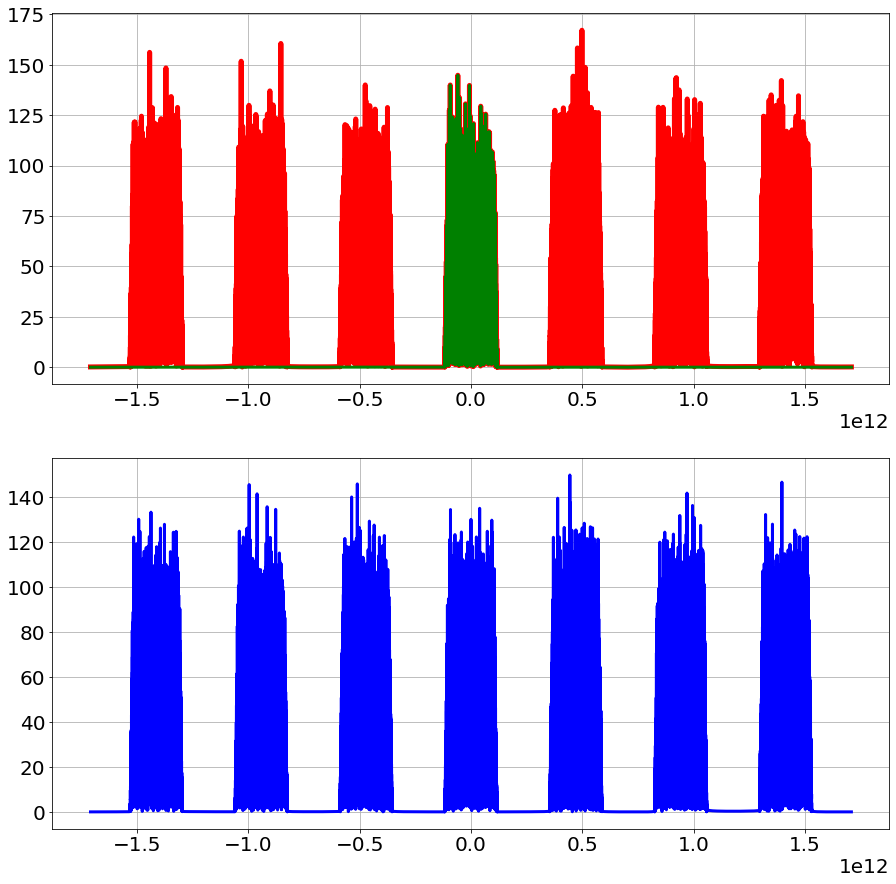

In [56]:
wdm = ch.create_wdm_parameters(n_channels=7, p_ave_dbm=0, n_symbols=2 ** 14, m_order=16, roll_off=0.1, upsampling=16,
                      downsampling_rate=4, symb_freq=34e9, channel_spacing=75e9, n_polarisations=2,
                      np_filter=0)

signal_x, signal_y, wdm_info = ch.generate_wdm_new(wdm)
signal_x = signal_x.numpy()
signal_y = signal_y.numpy()
nt = len(signal_x)
dt =  1. / wdm['sample_freq']
t_span = dt * nt

w = np.array([(i - nt / 2) * (2. * np.pi / t_span) for i in range(nt)])
f = np.array([(i - nt / 2) * (1. / t_span) for i in range(nt)])
t = np.array([dt * (k - nt / 2) for k in range(nt)])

w_channel = -2. * np.pi * wdm['channel_spacing'] * 0
signal_shifted = signal_x * np.exp(1.0j * w_channel * t)
spectrum = fftshift(fft(signal_shifted))


fig, axs = plt.subplots(2, 1, figsize=(15, 15))
axs[0].plot(w, np.absolute(spectrum), linewidth=5, color='red')
axs[0].plot(w, np.absolute(ch.cut_spectrum(spectrum, f, wdm['channel_spacing'])), linewidth=3, color='green')
axs[0].grid(True)

axs[1].plot(w, np.absolute(fftshift(fft(signal_y))), linewidth=3, color='blue')
axs[1].grid(True)

Single channel WDM

In [6]:
# mod_order = 64
alpha = 0.2
dispersion_parameter = 16.8
n_spans = 12
z_span = 80
gamma = 1.2
noise_figure_db = 4.5

# wdm = ch.get_default_wdm_parameters()
# wdm['n_symbols'] = 2 ** 15
# wdm['p_ave_dbm'] = 0
# wdm['upsampling'] = 8
# wdm['downsampling_rate'] = 4


wdm = ch.create_wdm_parameters(n_channels=1, p_ave_dbm=0, n_symbols=2 ** 14, m_order=16, roll_off=0.1, upsampling=16,
                      downsampling_rate=1, symb_freq=34e9, channel_spacing=0, n_polarisations=2,
                      np_filter=0)

# channel = ch.get_default_channel_parameters()
channel = ch.create_channel_parameters(n_spans=n_spans,
                                       z_span=z_span,
                                       alpha_db=alpha,
                                       gamma=gamma,
                                       noise_figure_db=noise_figure_db,
                                       dispersion_parameter=dispersion_parameter,
                                       dz=1)

result = ch.full_line_model(channel, wdm)


points_x = result['points_x']
points_orig_x = result['points_orig_x']
points_x_shifted = result['points_x_shifted']
points_y = result['points_y']
points_orig_y = result['points_orig_y']
points_y_shifted = result['points_y_shifted']

Signal generation took 190.34300000000002 ms
Signal propagation took 1882.677 ms
Signal energy before propagation (x / y): 2.4038819255196684e-10 2.4001172184709725e-10
Signal energy after propagation (x / y): 2.8424173250463847e-10 2.844017698674693e-10
Signal energy difference (x / y): 4.385353995267163e-11 4.439004802037208e-11
Matched filter took 1.9940000000000002 ms
BER (x / y): (3.0517578125e-05, 2) (0.000152587890625, 10)


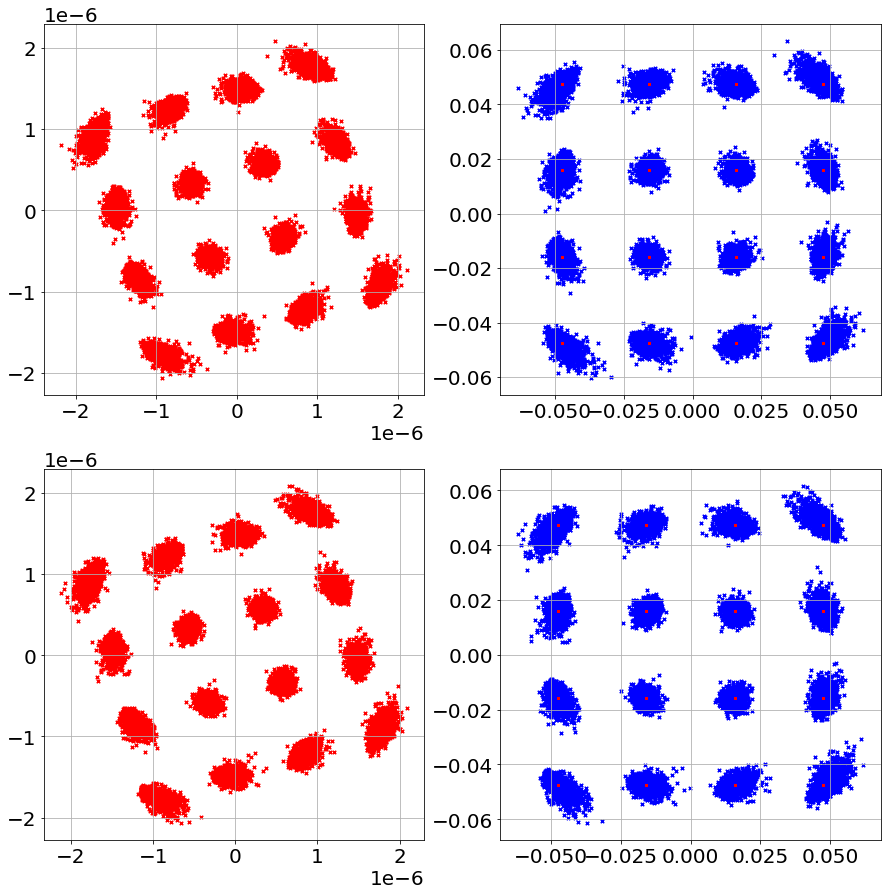

In [49]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0][0].scatter(points_x.real, points_x.imag, s=12, c='r', marker='x')
axs[0][0].grid(True)

axs[0][1].scatter(points_x_shifted.real, points_x_shifted.imag, s=12, c='b', marker='x')
axs[0][1].scatter(points_orig_x.real, points_orig_x.imag, s=6, c='r', marker='.')
axs[0][1].grid(True)

axs[1][0].scatter(points_y.real, points_y.imag, s=12, c='r', marker='x')
axs[1][0].grid(True)

axs[1][1].scatter(points_y_shifted.real, points_y_shifted.imag, s=12, c='b', marker='x')
axs[1][1].scatter(points_orig_y.real, points_orig_y.imag, s=6, c='r', marker='.')
axs[1][1].grid(True)

## OLD

In [ ]:
# channel = ch.create_channel_parameters(n_spans=10,
#                                        z_span=80,
#                                        alpha_db=0.1,
#                                        gamma=1.2,
#                                        noise_figure_db=-200,
#                                        dispersion_parameter=16.8,
#                                        dz=1)

channel = ch.create_channel_parameters(n_spans=12,
                                       z_span=80,
                                       alpha_db=0.2,
                                       gamma=1.2,
                                       noise_figure_db=4.5,
                                       dispersion_parameter=16.8,
                                       dz=1)


wdm = ch.create_wdm_parameters(n_channels=3, p_ave_dbm=0, n_symbols=2 ** 15, m_order=16, roll_off=0.1, upsampling=8,
                      downsampling_rate=4, symb_freq=34e9, channel_spacing=75e9, n_polarisations=2,
                      np_filter=0)


dt = 1. / wdm['sample_freq']

signal_x, signal_y, wdm_info = ch.generate_wdm_new(wdm)
print(np.shape(signal_x))

points_orig_x = wdm_info['points_x']
points_orig_y = wdm_info['points_y']


ft_filter_values = wdm_info['ft_filter_values_x']
print(np.shape(ft_filter_values))
np_signal = len(signal_x)

e_signal_x = ch.get_energy(signal_x, dt * np_signal)
e_signal_y = ch.get_energy(signal_y, dt * np_signal)

signal_x, signal_y = ch.propagate_manakov(channel, signal_x, signal_y, wdm['sample_freq'])

e_signal_x_prop = ch.get_energy(signal_x, dt * np_signal)
e_signal_y_prop = ch.get_energy(signal_y, dt * np_signal)

print("Signal energy before propagation (x / y):", e_signal_x, e_signal_y)
print("Signal energy after propagation (x / y):", e_signal_x_prop, e_signal_y_prop)
print("Signal energy difference (x / y):",
      np.absolute(e_signal_x - e_signal_x_prop),
      np.absolute(e_signal_y - e_signal_y_prop))

# signals_decoded = ch.matched_filter_wdm(signal_x, ft_filter_values, wdm)
#
# signals_decoded = []
#
# nt = len(signal_x)
# dt = 1. / wdm['sample_freq']
# t_span = dt * nt
# t = np.array([dt * (k - nt / 2) for k in range(nt)])
# f = np.array([(i - nt / 2) * (1. / t_span) for i in range(nt)])
#
#
#
# for k in range(wdm['n_channels']):
#     w_channel = 2. * np.pi * wdm['channel_spacing'] * (k - (wdm['n_channels'] - 1) // 2)
#     signal_shifted = signal_x * np.exp(1.0j * w_channel * t)
#     spectrum = ch.cut_spectrum(tf.signal.fftshift(tf.signal.fft(signal_shifted)), f, wdm['channel_spacing'])
#     signals_decoded.append(ch.matched_filter_spectral(spectrum, ft_filter_values[k]))
#
# print(np.shape(signals_decoded))
#
# for k in range(wdm['n_channels']):
#     signals_decoded[k] = signals_decoded[k][::wdm['downsampling_rate']]
#     # print(signals_decoded[k])
#
# print(np.shape(signals_decoded))
#
# samples_x = signals_decoded

# decoded = ch.matched_filter(sig, filt)
# # decoded = ch.filter_shaper(sig, filt)
#
# p_x = decoded[::wdm['upsampling']].numpy()

signal_x, signal_y = ch.dispersion_compensation(channel, signal_x, signal_y, 1. / wdm['sample_freq'])

samples_x = ch.receiver_wdm(signal_x, ft_filter_values, wdm)
samples_y = ch.receiver_wdm(signal_y, ft_filter_values, wdm)
# for k in range(wdm['n_channels']):
#     samples_x[k], samples_y[k] = ch.dispersion_compensation(channel, samples_x[k], samples_y[k], wdm['downsampling_rate'] / wdm['sample_freq'])

# # print(np.shape(samples_x))
#
points_x = []
points_y = []
#
points_x_shifted = []
points_y_shifted = []
#
sample_step = int(wdm['upsampling'] / wdm['downsampling_rate'])
for k in range(wdm['n_channels']):
    samples_x_temp = samples_x[k]
    samples_y_temp = samples_y[k]
#     # print(np.shape(samples_x_temp[::sample_step]))
    points_x.append(samples_x_temp[::sample_step].numpy())
    points_y.append(samples_y_temp[::sample_step].numpy())
#
    nl_shift_x = ch.nonlinear_shift(points_x[k], points_orig_x[k])
    points_x_shifted.append(points_x[k] * nl_shift_x)

    nl_shift_y = ch.nonlinear_shift(points_y[k], points_orig_y[k])
    points_y_shifted.append(points_y[k] * nl_shift_y)
#
mod_type = sg.get_modulation_type_from_order(wdm['m_order'])
#

# points_x_found = []
# points_y_found = []
for k in range(wdm['n_channels']):
    # print("BER (x / y):", BER_est(wdm['m_order'], points_x_shifted, points_orig_x), BER_est(wdm['m_order'], points_y_shifted, points_orig_y))

    # points_x_found.append(sg.get_nearest_constellation_points_unscaled(points_x_shifted[k], mod_type))
    # points_y_found.append(sg.get_nearest_constellation_points_unscaled(points_y_shifted[k], mod_type))

    print("BER (x / y):",
          sg.get_ber_by_points_ultimate(points_orig_x[k], points_x_shifted[k], mod_type),
          sg.get_ber_by_points_ultimate(points_orig_y[k], points_y_shifted[k], mod_type))

    # print("BER (x / y):",
    #       sg.get_ber_by_points_unscaled(points_orig_x[k], points_x[k], mod_type),
    #       sg.get_ber_by_points_unscaled(points_orig_y[k], points_y[k], mod_type))
#
# result = {
#     'points_x': points_x,
#     'points_orig_x': points_orig_x,
#     'points_x_shifted': points_x_shifted,
#     'points_y': points_y,
#     'points_orig_y': points_orig_y,
#     'points_y_shifted': points_y_shifted,
# }

In [1]:
import sys
# adding signal_handling to the system path
sys.path.insert(0, '../transmission_pedro/')

#  ######## SET THE Libraries #########
from IQ import *
from QoT import *
# from ICR import *
from RRC import *
from detectors import *
import matplotlib.pyplot as plt
# from Neuron import *
import scipy.signal
import pdb
import BER_calc

import numpy as np
from datetime import datetime


def BER_est(x, x_ref):
    QAM_order = M
    return BER_calc.QAM_BER_gray(x, x_ref, QAM_order)

####### Gray code ##########

# Helper function to xor two characters
def xor_c(a, b):
    return int(0) if (a == b) else int(1)


# Helper function to flip the bit
def flip(c):
    return int(1) if (c == int(0)) else int(0)


# function to convert binary string
# to gray string
def binarytoGray(binary, num_bits_symbol):
    gray = np.zeros((len(binary),), dtype=int)
    # MSB of gray code is same as
    # binary code
    NN = int(len(binary) / num_bits_symbol)
    count = 0
    for k in range(0, NN):
        gray[count] = binary[count]
        for j in range(count + 1, count + num_bits_symbol):
            gray[j] = xor_c(binary[j - 1], binary[j])
        count = count + num_bits_symbol
    return gray


# function to convert gray code
# string to binary string
def graytoBinary(gray, num_bits):
    NN = int(len(gray) / num_bits)
    binary = np.zeros((len(gray),), dtype=int)
    count = 0
    for k in range(0, NN):
        binary[count] = gray[count]
        for j in range(count + 1, count + num_bits):
            if gray[j] == 0:
                binary[j] = binary[j - 1]
            else:
                binary[j] = flip(binary[j - 1])
        count = count + num_bits
    return binary

In [2]:
import tensorflow as tf

2022-05-27 13:01:46.396177: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
def tf_ssfm_manakov_dispersive_step(first, second, dispersion):

    first_new = tf.signal.ifft(tf.signal.fft(first) * dispersion)
    second_new = tf.signal.ifft(tf.signal.fft(second) * dispersion)
    return first_new, second_new

def tf_ssfm_manakov_nonlinear_step(first, second, gamma, delta_z):

    abs_first = tf.cast(tf.math.abs(first), tf.complex128)
    abs_second = tf.cast(tf.math.abs(second), tf.complex128)
    first_new = first * tf.math.exp(tf.cast(1.0j * delta_z * 8.0 / 9.0 * gamma, tf.complex128) * (abs_first * abs_first + abs_second * abs_second))
    second_new = second * tf.math.exp(tf.cast(1.0j * delta_z * 8.0 / 9.0 * gamma, tf.complex128) * (abs_first * abs_first + abs_second * abs_second))
    return first_new, second_new

def tf_manakov_fiber_propogate(initial_first, initial_second, t_span, fiber_length, n_span, gamma, beta2, alpha=0, beta3=0):

    if abs(fiber_length) < 1e-15:
        return initial_first, initial_second

    dz = fiber_length / n_span
    # print(dz)

    if len(initial_first) != len(initial_second):
        print('[tf_manakov_fiber_propogate] Error: sizes of first and second polarisation have to be the same!')
        return initial_first, initial_second

    n = len(initial_first)
    w = tf.signal.fftshift(np.array([(i - n / 2) * (2. * np.pi / t_span) for i in range(n)], dtype=np.complex))
    w2 = tf.math.pow(w, 2)
    w3 = tf.math.pow(w, 3)
    # dispersion = tf.dtypes.complex(0.0, 0.5) * tf.dtypes.complex(beta2, 0.0) * w2
    # dispersion = tf.math.exp(0.5j * beta2 * tf.math.pow(w, 2))
    dispersion = tf.math.exp((0.5j * beta2 * w2 + 1. / 6. * beta3 * w3 - alpha / 2.) * dz)
    dispersion_half = tf.math.exp((0.5j * beta2 * w2 + 1. / 6. * beta3 * w3 - alpha / 2.) * dz / 2.)
    dispersion_mhalf = tf.math.exp((0.5j * beta2 * w2 + 1. / 6. * beta3 * w3 - alpha / 2.) * -dz / 2.)

    # D/2
    first, second = tf_ssfm_manakov_dispersive_step(initial_first, initial_second, dispersion_half)

    for n in range(n_span):
        first, second = tf_ssfm_manakov_nonlinear_step(first, second, gamma, dz)
        first, second = tf_ssfm_manakov_dispersive_step(first, second, dispersion)
        # ...

    # -D/2
    first, second = tf_ssfm_manakov_dispersive_step(first, second, dispersion_mhalf)

    return first, second

In [4]:
def rrcosfilter_our(N, alpha, Ts, Fs):
    """
    Generates a root raised cosine (RRC) filter (FIR) impulse response.

    Parameters
    ----------
    N : int
        Length of the filter in samples.

    alpha : float
        Roll off factor (Valid values are [0, 1]).

    Ts : float
        Symbol period in seconds.

    Fs : float
        Sampling Rate in Hz.

    Returns
    ---------

    time_idx : 1-D ndarray of floats
        Array containing the time indices, in seconds, for
        the impulse response.

    h_rrc : 1-D ndarray of floats
        Impulse response of the root raised cosine filter.
    """

    T_delta = 1/float(Fs)
    time_idx = ((np.arange(N)-N/2))*T_delta
    sample_num = np.arange(N)
    h_rrc = np.zeros(N, dtype=float)

    for x in sample_num:
        t = (x-N/2)*T_delta
        if t == 0.0:
            h_rrc[x] = 1.0 - alpha + (4*alpha/np.pi)
        elif alpha != 0 and t == Ts/(4*alpha):
            h_rrc[x] = (alpha/np.sqrt(2))*(((1+2/np.pi)* \
                    (np.sin(np.pi/(4*alpha)))) + ((1-2/np.pi)*(np.cos(np.pi/(4*alpha)))))
        elif alpha != 0 and t == -Ts/(4*alpha):
            h_rrc[x] = (alpha/np.sqrt(2))*(((1+2/np.pi)* \
                    (np.sin(np.pi/(4*alpha)))) + ((1-2/np.pi)*(np.cos(np.pi/(4*alpha)))))
        else:
            h_rrc[x] = (np.sin(np.pi*t*(1-alpha)/Ts) +  \
                    4*alpha*(t/Ts)*np.cos(np.pi*t*(1+alpha)/Ts))/ \
                    (np.pi*t*(1-(4*alpha*t/Ts)*(4*alpha*t/Ts))/Ts)

    return h_rrc

In [5]:
def rcos_spec(f, args):
    # args[0] - symbol time
    # args[1] - roll-off factor rho
    t_symb = args[0]
    p = args[1]

    if abs(f) <= (1. - p) / (2. * t_symb):
        return t_symb
    elif (1. - p) / (2. * t_symb) < abs(f) < (1. + p) / (2. * t_symb):

        cos_value = np.cos(np.pi * t_symb / (2. * p) * (abs(f) - (1. - p) / (2. * t_symb)))

        return t_symb * np.power(np.cos(np.pi * t_symb / (2. * p) * (abs(f) - (1. - p) / (2. * t_symb))), 2)
    else:
        return 0

def srrcos_spec(f, args):
    # args[0] - symbol time
    # args[1] - roll-off factor rho
    t_symb = args[0]
    p = args[1]

    return np.sqrt(rcos_spec(f, t_symb, p))

In [180]:
def receiver2(signal_tx, roll_off, Ts, Fs):
     v = signal_tx
     y = RRCfilter(0, roll_off, Ts, Fs)
     y.filter(v)
     out2 = y.qW / ((sum(y.sPSF ** 2)))
     return out2

def tf_convolution(signal, filter_val):

    np_signal_orig = len(signal)
    # conv_out = tf.zeros((len(signal)), dtype=tf.complex128)
    # conv_out = np.zeros((len(signal)), dtype=complex)
    np_filter = len(filter_val)
    add_zeros = np.array([0. for  i in range(np_filter)])
    signal_ext = tf.concat((add_zeros, signal, add_zeros), axis=0)
    # print(np.shape(signal), np.shape(signal_ext), np.shape(filter_val))
    np_signal = len(signal_ext)
    # for n in range(np_filter, np_signal + np_filter):
    #     # tf.reduce_sum(filter_val * signal_ext[n - np_filter: n])
    #     # print(np.shape())
    #     conv_out[n - np_filter] = tf.reduce_sum(filter_val * signal_ext[n - np_filter : n])

    conv_out = np.array([tf.reduce_sum(filter_val * signal_ext[n - np_filter : n]) for n in range(np_filter, np_signal_orig + np_filter)])

    conv_out = tf.cast(conv_out, tf.complex128)
    return conv_out


def filter_shaper(signal, filter_val):

    spectrum = tf.signal.fftshift(tf.signal.fft(signal))
    return tf.signal.ifft(tf.signal.ifftshift(spectrum * filter_val))

    # return tf_convolution(signal, filter_val)
    # return np.convolve(signal, filter_val)


def matched_filter(signal, filter_val):

    return filter_shaper(signal, filter_val) / tf.cast(tf.reduce_sum(tf.math.pow(tf.math.abs(filter_val), 2)), tf.complex128)

In [171]:
Fs * Ts * 32 * 2

512.0

In [199]:
n_spans = 12  # Number of spans
z_span = 80  # Span Length [km]
alpha_db = 0.225  # Attenuation coefficient [dB km^-1]
alpha = alpha_db / (10 * np.log10(np.exp(1)))
gamma = 0 # Non-linear Coefficient [W^-1 km^-1]. Default = 1.2
noise_figure_db = -200 # Noise Figure [dB]. Default = 4.5
noise_figure = 10 ** (noise_figure_db / 10)
gain = np.exp(alpha * z_span) # gain for one span
dispersion_parameter = 16.8 #  [ps nm^-1 km^-1]  dispersion parameter
beta2 = -(1550e-9 ** 2) * (dispersion_parameter * 1e-3) / (2 * np.pi * 3e8)  # conversion to beta2 - Chromatic Dispersion Coefficient [s^2 km^−1]
beta3 = 0
h_planck = 6.6256e-34  # Planck's constant [J/s]
# nu = 299792458 / 1550e-9  # light frequency carrier [Hz]
fc = 299792458 / 1550e-9  # carrier frequency


dz = 1.0  # length of the step for SSFM [km]
nz = int(z_span / dz)  # number of steps per each span

noise_density = h_planck * fc * (gain-1) * noise_figure
# noise_density = 0

Pot = 4  # PP[index]
# opt = [0, 1]
n_symbols = 2 ** 15  # Number of Symbols transmitted 1024
# numberOfsymbols = n_symbols
M = 16  # Modulation Level
roll_off = 0.1  # 1
upsampling = 8
downsampling_rate = 1
s = int(64e9)  # symbol frequency
# s = int(32e9)  # symbol frequency
Fs = int(s * upsampling)  # sampling frequency used for the discrete simulation of analog signals
dt = 1 / Fs

Ts = 1 / s  # symbol spacing
BN = 1 / (2 * Ts)  # Nyquist bandwidth of the base band signal
ups = int(Ts * Fs)  # Number of samples per second in the analog domain
filtlen = 2 ** 12  # Filter length in symbols

start_time = datetime.now()

#  ######## INITIATE I, Q and noise components of polarization X #########
Pot_Inicial_x = Pot / np.sqrt(2) # dBm
mod1 = QAMModem(M)
aa = int(mod1.num_bits_symbol * n_symbols)
X = np.random.randint(0, 2, aa, int)  # Random bit stream
sB = binarytoGray(X, mod1.num_bits_symbol)  # after gray code
sQ = mod1.modulate(sB) / np.sqrt(mod1.Es)  # Modulated baud points sQ = mod1.modulate(sB)/np.sqrt(mod1.Es)
sQ = sQ * np.sqrt((10 ** (Pot_Inicial_x / 10)) / 1000)

#  ######## INITIATE I, Q and noise components of polarization Y #########
Pot_Inicial_y = Pot / np.sqrt(2) # dBm
mod2 = QAMModem(M)
aay = int(mod2.num_bits_symbol * n_symbols)
X_y = np.random.randint(0, 2, aay, int)  # Random bit stream
sB_y = binarytoGray(X_y, mod2.num_bits_symbol)  # after gray code
sQ_y = mod2.modulate(sB_y) / np.sqrt(mod2.Es)  # Modulated baud points sQ = mod1.modulate(sB)/np.sqrt(mod1.Es)
sQ_y = sQ_y * np.sqrt((10 ** (Pot_Inicial_y / 10)) / 1000)

#  ######## Turning the Discrete signal in Countinuous  X #########

xxx = np.zeros(ups * n_symbols, dtype='complex')
xxx[::ups] = sQ  # every ups samples, the value of sQ is inserted into the sequence
t_x = np.arange(len(xxx)) / Fs
xxx = tf.cast(xxx, tf.complex128)

#  ######## Turning the Discrete signal in Countinuous  Y #########

yyy = np.zeros(ups * n_symbols, dtype='complex')
yyy[::ups] = sQ_y  # every ups samples, the value of sQ is inserted into the sequence
t_y = np.arange(len(yyy)) / Fs
yyy = tf.cast(yyy, tf.complex128)

#  ######## Root Raised Cosine Filter X #########

np_xxx = len(xxx)
# add_zeros = np.array([0. for  i in range(int((np_xxx - filtlen) / 2))])

# filtlen = np_xxx
# filter_values = tf.signal.fftshift(tf.signal.fft(rrcosfilter_our(filtlen, roll_off, Ts, Fs)))
filter_values = rrcosfilter_our(filtlen, roll_off, Ts, Fs * int(np_xxx / filtlen))
print(np.shape(filter_values))
filter_values_ups = np.zeros((np_xxx), dtype=complex)
filter_values_ups[::int(np_xxx / filtlen)] = filter_values
print(len(filter_values_ups), np_xxx)
# filter_values = np.concatenate((add_zeros, filter_values, add_zeros), axis=0)
filter_values_ups = tf.cast(filter_values_ups, tf.complex128)

ft_filter_values = tf.signal.fftshift(tf.signal.fft(filter_values_ups))


# FIR = RRCfilter(filtlen, roll_off, Ts, Fs)
# FIR.filter(xxx)

signal_tx = filter_shaper(xxx, ft_filter_values)

#  ######## Root Raised Cosine Filter Y #########

# FIR_y = RRCfilter(filtlen, roll_off, Ts, Fs)
# FIR_y.filter(yyy)

signal_ty = filter_shaper(yyy, ft_filter_values)

#  ######## Signal Transmitted  X #########

# signal_tx = FIR.qW

#  ######## Signal Transmitted  X #########

# signal_ty = FIR_y.qW

#  ######### Physical Layer Model #########



# aux = signal_tx
# auy = signal_ty

aux = tf.cast(signal_tx, tf.complex128)
auy = tf.cast(signal_ty, tf.complex128)

# ii = complex(0, 1)
# w = 0
# wy = 0

end_time = datetime.now()
time_diff = (end_time - start_time)
execution_time = time_diff.total_seconds() * 1000
print("Signal generation took", execution_time, "ms")

nt = len(aux)
print(nt)
t_span = dt * nt
start_time = datetime.now()


for span_ind in range(n_spans):
    aux, auy = tf_manakov_fiber_propogate(aux, auy, t_span, z_span, nz, gamma, beta2, alpha=alpha, beta3=0)

    noise_x = (np.random.normal(0, 1, size=nt) + 1.0j * np.random.normal(0, 1, size=nt)) / np.sqrt(2)
    noise_y = (np.random.normal(0, 1, size=nt) + 1.0j * np.random.normal(0, 1, size=nt)) / np.sqrt(2)
    std = np.sqrt(noise_density * Fs)

    aux = np.sqrt(gain) * aux + noise_x * std
    auy = np.sqrt(gain) * auy + noise_y * std


end_time = datetime.now()
time_diff = (end_time - start_time)
execution_time = time_diff.total_seconds() * 1000
print("Signal propagation took", execution_time, "ms")


start_time = datetime.now()
#   ########  Receptor X #############
# Out_MatchedFilter = receiver2(aux, roll_off, Ts, Fs)
Out_MatchedFilter = matched_filter(aux, ft_filter_values)
# delay = int(2 * 32 * ups)
delay = 0
x = Out_MatchedFilter[delay:delay + n_symbols * ups:downsampling_rate]  # every ups samples, the value of sQ is inserted into the sequence


#   ########  Receptor Y #############
# Out_MatchedFiltery = receiver2(auy, roll_off, Ts, Fs )
Out_MatchedFiltery = matched_filter(auy, ft_filter_values)
y = Out_MatchedFiltery[delay:delay + n_symbols * ups:downsampling_rate]  # every ups samples, the value of sQ is inserted into the sequence

end_time = datetime.now()
time_diff = (end_time - start_time)
execution_time = time_diff.total_seconds() * 1000
print("Matched filter took", execution_time, "ms")

#  Dispersion compensation #
nt_cdc = len(x)
w = tf.signal.fftshift(np.array([(i - nt_cdc / 2) * (2. * np.pi / t_span) for i in range(nt_cdc)], dtype=np.complex))
w2 = tf.math.pow(w, 2)
w3 = tf.math.pow(w, 3)
dispersion = tf.math.exp((0.5j * beta2 * w2 + 1. / 6. * beta3 * w3) * (-z_span * n_spans))
signal_end, signal_end_y = tf_ssfm_manakov_dispersive_step(tf.cast(x, tf.complex128), tf.cast(y, tf.complex128), dispersion)
print("len:", len(signal_end), len(signal_end_y))

sample_step = int(upsampling / downsampling_rate)
# sample_step = 1
signal_end_cdc = signal_end[::sample_step]
signal_end_y_cdc = signal_end_y[::sample_step]
print(len(signal_end_cdc))
# signal_end = (np.fft.ifft((np.fft.fft(aux)) * np.exp(-L_s * N_s * ii * (bb * (w ** 2)) / 2)))
#  Dispersion compensation Y #
# signal_end_y = (np.fft.ifft((np.fft.fft(auy)) * np.exp(-L_s * N_s * ii * (bb * (wy ** 2)) / 2)))


# print(len(Out_MatchedFilter))
# print(len(Out_MatchedFiltery))

#  ##### Finding the complex Numbers in the Receiver X ########

nl_shift = np.dot(np.transpose(np.conjugate(sQ)), sQ) / np.dot(np.transpose(np.conjugate(sQ)), signal_end_cdc)
x_shifted = signal_end_cdc * nl_shift
xx = x_shifted.numpy()
points_rx_x = signal_end_cdc.numpy()

#  ##### Finding the complex Numbers in the Receiver Y ########


nl_shifty = np.dot(np.transpose(np.conjugate(sQ_y)), sQ_y) / np.dot(np.transpose(np.conjugate(sQ_y)), signal_end_y_cdc)
y_shifted = signal_end_y_cdc * nl_shifty
yy = y_shifted.numpy()
points_rx_y = signal_end_y_cdc.numpy()

print(len(xx), len(yy))

(4096,)
262144 262144
Signal generation took 318.02200000000005 ms
262144
Signal propagation took 2615.619 ms
Matched filter took 5.524 ms
len: 262144 262144
32768
32768 32768


0.4340362548828125


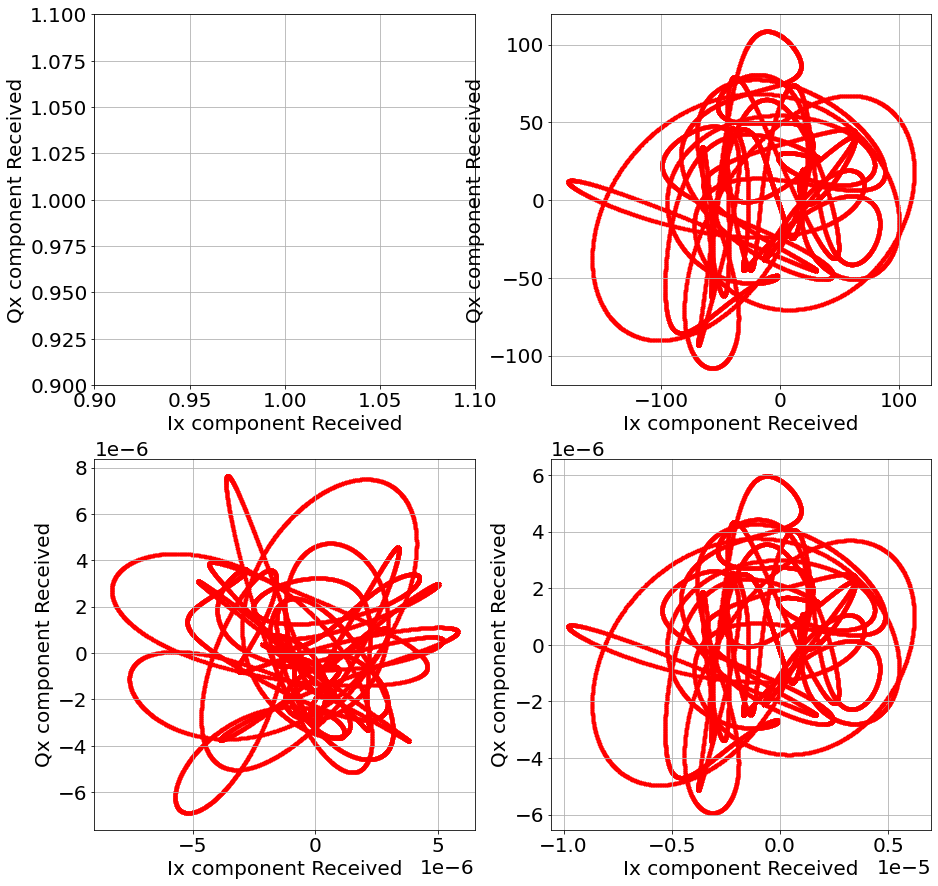

In [200]:
#  ##### Plots Received Constellations ########
import matplotlib
matplotlib.rcParams.update({'font.size': 20})

# scale_coef = np.sqrt(2)
scale_coef = 1
range_plot = np.arange(0, len(xx))

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0][0].scatter(xx.real[range_plot] * np.sqrt(mod1.Es) / np.sqrt((10 ** (Pot_Inicial_x * scale_coef / 10)) / 1000),
            xx.imag[range_plot] * np.sqrt(mod1.Es) / np.sqrt((10 ** (Pot_Inicial_x * scale_coef / 10)) / 1000), s=8, c='r', marker='x')
# axs[0][0].scatter(xx.real[range_plot], xx.imag[range_plot], s=8, c='r', marker='x')
axs[0][0].set_xlabel("Ix component Received")
axs[0][0].set_ylabel("Qx component Received")
axs[0][0].grid(True)
axs[0][0].set_xlim(0.9, 1.1)
axs[0][0].set_ylim(0.9, 1.1)

axs[0][1].scatter(yy.real[range_plot] * np.sqrt(mod2.Es) / np.sqrt((10 ** (Pot_Inicial_y * scale_coef / 10)) / 1000),
            yy.imag[range_plot] * np.sqrt(mod2.Es) / np.sqrt((10 ** (Pot_Inicial_y * scale_coef / 10)) / 1000), s=8, c='r', marker='x')
# axs[0][1].scatter(yy.real[range_plot], yy.imag[range_plot], s=8, c='r', marker='x')
axs[0][1].set_xlabel("Ix component Received")
axs[0][1].set_ylabel("Qx component Received")
axs[0][1].grid(True)

axs[1][0].scatter(points_rx_x.real[range_plot], points_rx_x.imag[range_plot], s=8, c='r', marker='x')
axs[1][0].set_xlabel("Ix component Received")
axs[1][0].set_ylabel("Qx component Received")
axs[1][0].grid(True)

axs[1][1].scatter(points_rx_y.real[range_plot], points_rx_y.imag[range_plot], s=8, c='r', marker='x')
axs[1][1].set_xlabel("Ix component Received")
axs[1][1].set_ylabel("Qx component Received")
axs[1][1].grid(True)

# fig.show()


print(BER_est(xx[range_plot], sQ[range_plot]))

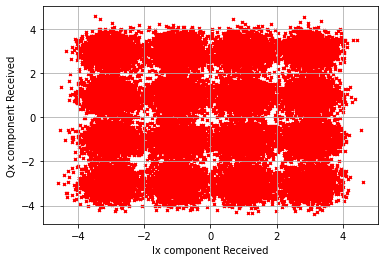

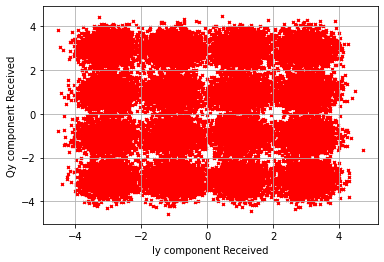

0.00212860107421875


In [102]:

#  ##### Plots Received Constellations ########

# scale_coef = np.sqrt(2)
scale_coef = 1

axs = plt
axs.scatter(xx.real * np.sqrt(mod1.Es) / np.sqrt((10 ** (Pot_Inicial_x * scale_coef / 10)) / 1000),
            xx.imag * np.sqrt(mod1.Es) / np.sqrt((10 ** (Pot_Inicial_x * scale_coef / 10)) / 1000), s=8, c='r', marker='x')
plt.xlabel("Ix component Received")
plt.ylabel("Qx component Received")
plt.grid()
plt.show()

axs = plt
axs.scatter(yy.real * np.sqrt(mod2.Es) / np.sqrt((10 ** (Pot_Inicial_y * scale_coef / 10)) / 1000),
            yy.imag * np.sqrt(mod2.Es) / np.sqrt((10 ** (Pot_Inicial_y * scale_coef / 10)) / 1000), s=8, c='r', marker='x')
plt.xlabel("Iy component Received")
plt.ylabel("Qy component Received")
plt.grid()
plt.show()

print(BER_est(xx, sQ))

In [125]:
a = np.array([1., 1., 1., 1.])
b = np.array([0. for  i in range(int((20. - len(a)) / 2))])
a = tf.cast(a, tf.complex128)
b = tf.cast(b, tf.complex128)
c = tf.concat((b, a, b), axis=0)
print(len(c), c)

20 tf.Tensor(
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 1.+0.j
 1.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j], shape=(20,), dtype=complex128)


In [116]:
np_xxx = len(xxx)
add_zeros = np.array([0. for  i in range(int((np_xxx - filtlen) / 2))])

# filtlen = np_xxx
filtlen = 2 ** 12
filter_values = tf.signal.fftshift(tf.signal.fft(rrcosfilter_our(filtlen, 0, Ts / (np_xxx / filtlen), Fs)))
filter_values = np.concatenate((add_zeros, filter_values, add_zeros), axis=0)
filter_values = tf.cast(filter_values, tf.complex128)

In [87]:
np_xxx / 2 ** 12

64.0

(128072.0, 134072.0)

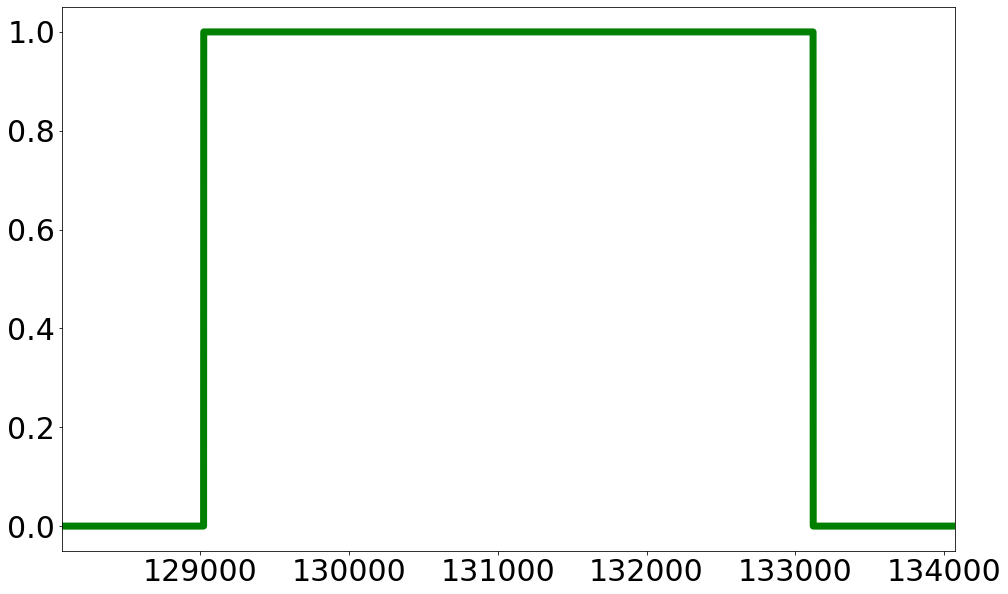

In [119]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax.plot(np.absolute(filter_values), color='green',
        label="Filter",
        marker='v',
        markersize=0.0,
        linewidth=7.0)
shift_plot = 3000
ax.set_xlim(len(filter_values)/2-shift_plot, len(filter_values)/2+shift_plot)

In [1]:
import channel_model as ch
import signal_generation as sg
from importlib import reload
reload(ch)
reload(sg)

# mod_order = 64
alpha = 0.2
dispersion_parameter = 18
n_spans = 9
z_span = 80
gamma = 1.2

# wdm = ch.get_default_wdm_parameters()
# wdm['n_symbols'] = 2 ** 15
# wdm['p_ave_dbm'] = 0
# wdm['upsampling'] = 8
# wdm['downsampling_rate'] = 4


wdm = ch.create_wdm_parameters(n_channels=3, p_ave_dbm=2, n_symbols=2 ** 15, m_order=16, roll_off=0.1, upsampling=8,
                      downsampling_rate=4, symb_freq=34e9, channel_spacing=0, n_polarisations=2,
                      np_filter=0)

# channel = ch.get_default_channel_parameters()
channel = ch.create_channel_parameters(n_spans=n_spans,
                                       z_span=z_span,
                                       alpha_db=alpha,
                                       gamma=gamma,
                                       noise_figure_db=4.5,
                                       dispersion_parameter=dispersion_parameter,
                                       dz=1)

result = ch.full_line_model_wdm(channel, wdm)


2022-06-23 13:21:00.364794: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-06-23 13:21:03.127243: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-23 13:21:03.130294: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-06-23 13:21:03.192237: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-23 13:21:03.192673: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3070 Laptop GPU computeCapability: 8.6
coreClock: 1.56GHz coreCount: 40 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2022-06-23 13:21:03.192710: I tensorflow/stream_executor/p

Signal generation took 733276.1020000001 ms
Signal propagation took 1384.628 ms
Signal energy before propagation (x / y): 6.873587258119405e-09 6.873587258119405e-09
Signal energy after propagation (x / y): 6.906667398031905e-09 6.905057780788463e-09
Signal energy difference (x / y): 3.308013991250027e-11 3.147052266905824e-11
Matched filter took 93.683 ms
Matched filter took 79.92299999999999 ms


ValueError: cannot convert float NaN to integer

In [1]:
import tensorflow as tf

wdm = ch.create_wdm_parameters(n_channels=1, p_ave_dbm=2, n_symbols=2 ** 15, m_order=16, roll_off=0.1, upsampling=8,
                      downsampling_rate=4, symb_freq=34e9, channel_spacing=0, n_polarisations=2,
                      np_filter=0)

signal_x, signal_y, wdm_info = ch.generate_wdm_new(wdm)
print(np.shape(signal_x))
print(np.shape(wdm_info['ft_filter_values_x']))

signals_decoded = []

nt = len(signal_x)
t_span = 1 / wdm['sample_freq'] * nt
f = np.array([(i - nt / 2) * (1. / t_span) for i in range(nt)])

samples_x = []
temp = ch.receiver(signal_x, signal_x, wdm_info['ft_filter_values_x'][0], wdm['downsampling_rate'])
samples_x.append(temp[0])
# samples_x = ch.receiver_wdm(signal_x, wdm_info['ft_filter_values_x'][0], wdm)
# samples_y = ch.receiver_wdm(signal_y, wdm_info['ft_filter_values_y'][0], wdm)

points_x = []
# points_y = []

points_x_shifted = []
# points_y_shifted = []


points_orig_x = wdm_info['points_x']
# points_orig_y = wdm_info['points_y']

sample_step = int(wdm['upsampling'] / wdm['downsampling_rate'])
for k in range(wdm['n_channels']):
    samples_x_temp = samples_x[k]
    # samples_y_temp = samples_y[k]
    # print(np.shape(samples_x_temp[::sample_step]))
    points_x.append(samples_x_temp[::sample_step].numpy())
    # points_y.append(samples_y_temp[::sample_step].numpy())

    nl_shift_x = ch.nonlinear_shift(points_x[k], points_orig_x[k])
    points_x_shifted.append(points_x[k] * nl_shift_x)

    # nl_shift_y = ch.nonlinear_shift(points_y[k], points_orig_y[k])
    # points_y_shifted.append(points_y[k] * nl_shift_y)

mod_type = sg.get_modulation_type_from_order(wdm['m_order'])


print(np.shape(samples_x), np.shape(signals_decoded))

2022-06-22 12:58:07.899518: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


NameError: name 'ch' is not defined

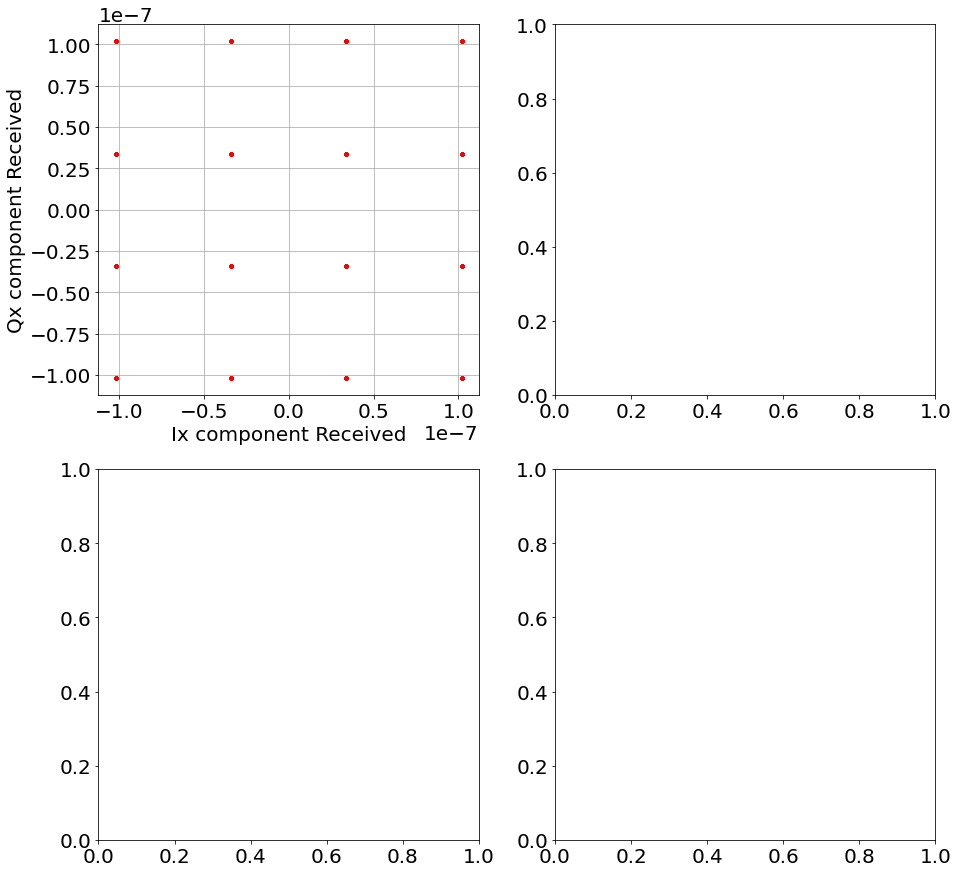

In [150]:
ind = 0

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
# axs[0][0].scatter(xx.real[range_plot] * np.sqrt(mod1.Es) / np.sqrt((10 ** (Pot_Inicial_x * scale_coef / 10)) / 1000),
#             xx.imag[range_plot] * np.sqrt(mod1.Es) / np.sqrt((10 ** (Pot_Inicial_x * scale_coef / 10)) / 1000), s=8, c='r', marker='x')
axs[0][0].scatter(points_x[ind].real[range_plot], points_x[ind].imag[range_plot], s=8, c='r', marker='x')
# axs[0][0].scatter(points_x.real[range_plot_test], points_x.imag[range_plot_test], s=8, c='g', marker='x')
# axs[0][0].scatter(points_orig_x[ind].real[range_plot], points_orig_x[ind].imag[range_plot], s=8, c='b', marker='x')
axs[0][0].set_xlabel("Ix component Received")
axs[0][0].set_ylabel("Qx component Received")
axs[0][0].grid(True)
# axs[0][0].set_xlim(0.9, 1.1)
# axs[0][0].set_ylim(0.9, 1.1)

# # axs[0][1].scatter(yy.real[range_plot] * np.sqrt(mod2.Es) / np.sqrt((10 ** (Pot_Inicial_y * scale_coef / 10)) / 1000),
# #             yy.imag[range_plot] * np.sqrt(mod2.Es) / np.sqrt((10 ** (Pot_Inicial_y * scale_coef / 10)) / 1000), s=8, c='r', marker='x')
# axs[0][1].scatter(points_y[ind].real[range_plot], points_y[ind].imag[range_plot], s=8, c='r', marker='x')
# axs[0][1].scatter(points_orig_y[ind].real[range_plot], points_orig_y[ind].imag[range_plot], s=8, c='b', marker='x')
# axs[0][1].set_xlabel("Ix component Received")
# axs[0][1].set_ylabel("Qx component Received")
# axs[0][1].grid(True)
# #
# axs[1][0].scatter(points_x_scaled.real[range_plot], points_x_scaled.imag[range_plot], s=8, c='r', marker='o')
# axs[1][0].scatter(points_x_orig_scaled.real[range_plot], points_x_orig_scaled.imag[range_plot], s=20, c='b', marker='*')
# axs[1][0].set_xlabel("Ix component Received")
# axs[1][0].set_ylabel("Qx component Received")
# axs[1][0].grid(True)
#
# axs[1][1].scatter(points_y_scaled.real[range_plot], points_y_scaled.imag[range_plot], s=8, c='r', marker='x')
# axs[1][1].scatter(points_y_orig_scaled.real[range_plot], points_y_orig_scaled.imag[range_plot], s=8, c='b', marker='x')
# axs[1][1].set_xlabel("Ix component Received")
# axs[1][1].set_ylabel("Qx component Received")
# axs[1][1].grid(True)

In [114]:
print(np.shape(signals_decoded[0]))
print(signals_decoded[0][0].numpy())

(1, 262144)
[-1.30538487e-10+1.82339474e-10j -1.30538487e-10+1.82339474e-10j
 -1.30538487e-10+1.82339474e-10j ... -1.30538487e-10+1.82339474e-10j
 -1.30538487e-10+1.82339474e-10j -1.30538487e-10+1.82339474e-10j]


In [7]:
print(np.mean(np.absolute(sg.get_constellation('16qam'))))
print(np.mean(np.absolute(points_x)))

2.995352392457285
0.02654470790247896


In [85]:
from datetime import datetime
reload(sg)

points_x = result['points_x_shifted']
points_y = result['points_y_shifted']

points_x_orig = result['points_orig_x']
points_y_orig = result['points_orig_y']

scale_x = np.mean(np.absolute(sg.get_constellation('16qam'))) / np.mean(np.absolute(points_x))
scale_y = np.mean(np.absolute(sg.get_constellation('16qam'))) / np.mean(np.absolute(points_y))

scale_x_orig = np.mean(np.absolute(sg.get_constellation('16qam'))) / np.mean(np.absolute(points_x_orig))
scale_y_orig = np.mean(np.absolute(sg.get_constellation('16qam'))) / np.mean(np.absolute(points_y_orig))

# print(scale_x_orig, scale_x)

points_x_scaled = points_x * scale_x
points_y_scaled = points_y * scale_y

points_x_orig_scaled = points_x_orig * scale_x_orig
points_y_orig_scaled = points_y_orig * scale_y_orig

start_time = datetime.now()
points_found = sg.get_nearest_constellation_points(points_x, '16qam')
end_time = datetime.now()
time_diff = (end_time - start_time)
execution_time = time_diff.total_seconds() * 1000
print("Constellation points search took", execution_time, "ms")

print(len(points_x))

print(sg.get_ber_by_points(points_x_orig_scaled, points_x_scaled, '16qam'))
print(sg.get_ber_by_points(points_y_orig_scaled, points_y_scaled, '16qam'))

print(sg.get_ber_by_points_unscaled(points_x_orig, points_x, '16qam'))


print("BER (x / y):",
      ch.BER_est(wdm['m_order'], points_x / np.mean(np.absolute(points_x)), points_x_orig),
      ch.BER_est(wdm['m_order'], points_y / np.mean(np.absolute(points_y)), points_y_orig))


Constellation points search took 1455.242 ms
32768
(0.12018585205078125, 15753)
(0.126495361328125, 16580)
(0.12018585205078125, 15753)
BER (x / y): 0.25067901611328125 0.24890899658203125


In [69]:
points_x = result['points_x_shifted']
points_y = result['points_y_shifted']

points_x_orig = result['points_orig_x']
points_y_orig = result['points_orig_y']

slice = 2 ** 10
n_slice_steps = len(points_x) // slice

for k in range(n_slice_steps):

    print("BER (x / y):",
          ch.BER_est(wdm['m_order'], points_x[k * slice: (k + 1) * slice], points_x_orig[k * slice: (k + 1) * slice]),
          ch.BER_est(wdm['m_order'], points_y[k * slice: (k + 1) * slice], points_y_orig[k * slice: (k + 1) * slice]), )
    # print('SER (x / y):', points_x)

BER (x / y): 0.0 0.0
BER (x / y): 0.0 0.000244140625
BER (x / y): 0.0 0.0
BER (x / y): 0.000244140625 0.0
BER (x / y): 0.0 0.0
BER (x / y): 0.0 0.0
BER (x / y): 0.0 0.0
BER (x / y): 0.0 0.0
BER (x / y): 0.0 0.0
BER (x / y): 0.0 0.0
BER (x / y): 0.0 0.0
BER (x / y): 0.000244140625 0.0
BER (x / y): 0.0 0.0
BER (x / y): 0.0 0.0
BER (x / y): 0.0 0.000244140625
BER (x / y): 0.0 0.0
BER (x / y): 0.0 0.0
BER (x / y): 0.0 0.0
BER (x / y): 0.0 0.0
BER (x / y): 0.0 0.0
BER (x / y): 0.0 0.0
BER (x / y): 0.0 0.0
BER (x / y): 0.0 0.0
BER (x / y): 0.0 0.0
BER (x / y): 0.0 0.0
BER (x / y): 0.0 0.0
BER (x / y): 0.0 0.0
BER (x / y): 0.0 0.0
BER (x / y): 0.0 0.0
BER (x / y): 0.0 0.0
BER (x / y): 0.0 0.000244140625
BER (x / y): 0.0 0.0


In [10]:
points_x = result['points_x_shifted']
points_y = result['points_y_shifted']

points_x_orig = result['points_orig_x']
points_y_orig = result['points_orig_y']

slice = 2 ** 0

print("Length: ", len(points_x[slice: -slice]),
      "BER (x / y):",
          ch.BER_est(wdm['m_order'], points_x[slice: -slice], points_x_orig[slice: -slice]),
          ch.BER_est(wdm['m_order'], points_y[slice: -slice], points_y_orig[slice: -slice]))

slice = 2 ** 10

print("Length: ", len(points_x[slice: -slice]),
      "BER (x / y):",
          ch.BER_est(wdm['m_order'], points_x[slice: -slice], points_x_orig[slice: -slice]),
          ch.BER_est(wdm['m_order'], points_y[slice: -slice], points_y_orig[slice: -slice]))

slice = 2 ** 11

print("Length: ", len(points_x[slice: -slice]),
    "BER (x / y):",
          ch.BER_est(wdm['m_order'], points_x[slice: -slice], points_x_orig[slice: -slice]),
          ch.BER_est(wdm['m_order'], points_y[slice: -slice], points_y_orig[slice: -slice]))

slice = 2 ** 12

print("Length: ", len(points_x[slice: -slice]),
    "BER (x / y):",
          ch.BER_est(wdm['m_order'], points_x[slice: -slice], points_x_orig[slice: -slice]),
          ch.BER_est(wdm['m_order'], points_y[slice: -slice], points_y_orig[slice: -slice]))

slice = 2 ** 13

print("Length: ", len(points_x[slice: -slice]),
      "BER (x / y):",
      ch.BER_est(wdm['m_order'], points_x[slice: -slice], points_x_orig[slice: -slice]),
      ch.BER_est(wdm['m_order'], points_y[slice: -slice], points_y_orig[slice: -slice]))

Length:  32766 BER (x / y): 0.0011088730187796293 0.0011190461657409102
Length:  30720 BER (x / y): 0.0011121961805555555 0.001123046875
Length:  28672 BER (x / y): 0.0011393229166666667 0.0011683872767857143
Length:  24576 BER (x / y): 0.0009765625 0.0011461046006944445
Length:  16384 BER (x / y): 0.0009867350260416667 0.001312255859375


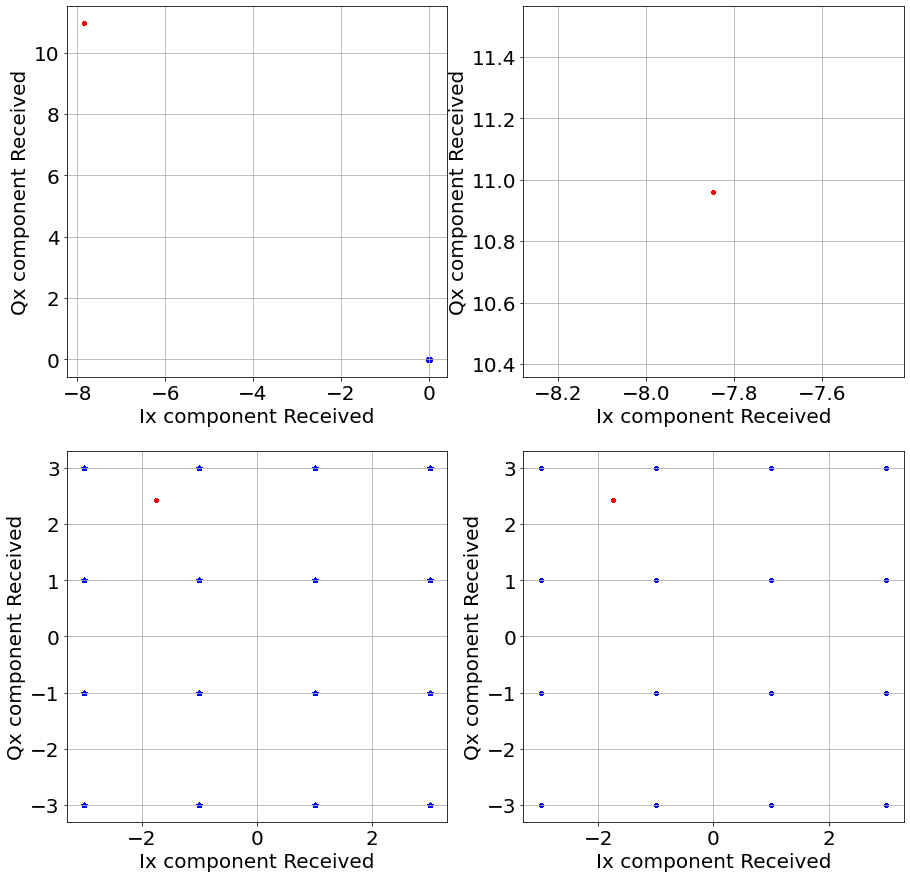

In [131]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 20})

ind = 0

points_x = result['points_x_shifted'][ind]
points_y = result['points_y_shifted'][ind]
points_x_rx = result['points_x'][ind]
points_y_rx = result['points_y'][ind]
points_x_orig = result['points_orig_x'][ind]
points_y_orig = result['points_orig_y'][ind]




scale_x = np.mean(np.absolute(sg.get_constellation('16qam'))) / np.mean(np.absolute(points_x))
scale_y = np.mean(np.absolute(sg.get_constellation('16qam'))) / np.mean(np.absolute(points_y))
scale_x_orig = np.mean(np.absolute(sg.get_constellation('16qam'))) / np.mean(np.absolute(points_x_orig))
scale_y_orig = np.mean(np.absolute(sg.get_constellation('16qam'))) / np.mean(np.absolute(points_y_orig))

points_x_scaled = points_x * scale_x
points_y_scaled = points_y * scale_y
points_x_orig_scaled = points_x_orig * scale_x_orig
points_y_orig_scaled = points_y_orig * scale_y_orig




# scale_coef = np.sqrt(2)
scale_coef = 1
range_plot = np.arange(0, len(points_x))

# range_plot_test = np.arange(2000, wdm['n_symbols'] - 2000)
range_plot_test = np.arange(wdm['n_symbols'] - 2000, wdm['n_symbols'])

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
# axs[0][0].scatter(xx.real[range_plot] * np.sqrt(mod1.Es) / np.sqrt((10 ** (Pot_Inicial_x * scale_coef / 10)) / 1000),
#             xx.imag[range_plot] * np.sqrt(mod1.Es) / np.sqrt((10 ** (Pot_Inicial_x * scale_coef / 10)) / 1000), s=8, c='r', marker='x')
axs[0][0].scatter(points_x.real[range_plot], points_x.imag[range_plot], s=8, c='r', marker='x')
# axs[0][0].scatter(points_x.real[range_plot_test], points_x.imag[range_plot_test], s=8, c='g', marker='x')
axs[0][0].scatter(points_x_orig.real[range_plot], points_x_orig.imag[range_plot], s=8, c='b', marker='x')
axs[0][0].set_xlabel("Ix component Received")
axs[0][0].set_ylabel("Qx component Received")
axs[0][0].grid(True)
# axs[0][0].set_xlim(0.9, 1.1)
# axs[0][0].set_ylim(0.9, 1.1)

# axs[0][1].scatter(yy.real[range_plot] * np.sqrt(mod2.Es) / np.sqrt((10 ** (Pot_Inicial_y * scale_coef / 10)) / 1000),
#             yy.imag[range_plot] * np.sqrt(mod2.Es) / np.sqrt((10 ** (Pot_Inicial_y * scale_coef / 10)) / 1000), s=8, c='r', marker='x')
axs[0][1].scatter(points_y.real[range_plot], points_y.imag[range_plot], s=8, c='r', marker='x')
axs[0][1].scatter(points_y_orig.real[range_plot], points_y_orig.imag[range_plot], s=8, c='b', marker='x')
axs[0][1].set_xlabel("Ix component Received")
axs[0][1].set_ylabel("Qx component Received")
axs[0][1].grid(True)

axs[1][0].scatter(points_x_scaled.real[range_plot], points_x_scaled.imag[range_plot], s=8, c='r', marker='o')
axs[1][0].scatter(points_x_orig_scaled.real[range_plot], points_x_orig_scaled.imag[range_plot], s=20, c='b', marker='*')
axs[1][0].set_xlabel("Ix component Received")
axs[1][0].set_ylabel("Qx component Received")
axs[1][0].grid(True)

axs[1][1].scatter(points_y_scaled.real[range_plot], points_y_scaled.imag[range_plot], s=8, c='r', marker='x')
axs[1][1].scatter(points_y_orig_scaled.real[range_plot], points_y_orig_scaled.imag[range_plot], s=8, c='b', marker='x')
axs[1][1].set_xlabel("Ix component Received")
axs[1][1].set_ylabel("Qx component Received")
axs[1][1].grid(True)

In [56]:
# test WDM

wdm = ch.get_default_wdm_parameters()
wdm['n_symbols'] = 2 ** 5
wdm['p_ave_dbm'] = 4

signal_x, signal_y, additional = ch.generate_wdm(wdm)

sample_freq = int(wdm['symb_freq'] * wdm['upsampling'])
dt = 1. / sample_freq
np_signal = len(signal_x)
t_span = dt * np_signal

t = np.array([-t_span / 2. + dt * k for k in range(np_signal)])

Signal generation took 17.316000000000003 ms


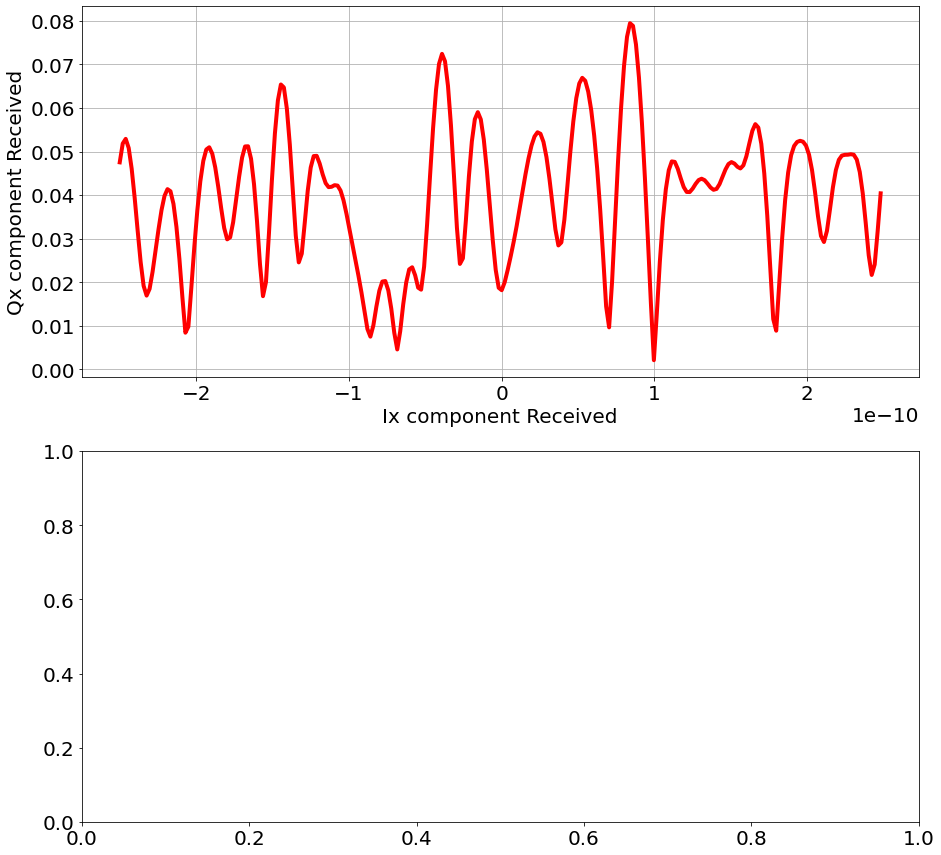

In [57]:
fig, axs = plt.subplots(2, 1, figsize=(15, 15))
# axs[0][0].scatter(xx.real[range_plot] * np.sqrt(mod1.Es) / np.sqrt((10 ** (Pot_Inicial_x * scale_coef / 10)) / 1000),
#             xx.imag[range_plot] * np.sqrt(mod1.Es) / np.sqrt((10 ** (Pot_Inicial_x * scale_coef / 10)) / 1000), s=8, c='r', marker='x')
axs[0].plot(t, np.absolute(signal_x), linewidth=4, color='red')
axs[0].set_xlabel("Ix component Received")
axs[0].set_ylabel("Qx component Received")
axs[0].grid(True)
# axs[0][0].set_xlim(0.9, 1.1)
# axs[0][0].set_ylim(0.9, 1.1)

# axs[0][1].scatter(yy.real[range_plot] * np.sqrt(mod2.Es) / np.sqrt((10 ** (Pot_Inicial_y * scale_coef / 10)) / 1000),
#             yy.imag[range_plot] * np.sqrt(mod2.Es) / np.sqrt((10 ** (Pot_Inicial_y * scale_coef / 10)) / 1000), s=8, c='r', marker='x')
# axs[1].scatter(points_y.real[range_plot], points_y.imag[range_plot], s=8, c='r', marker='x')
# axs[1].scatter(points_y_orig.real[range_plot], points_y_orig.imag[range_plot], s=8, c='b', marker='x')
# axs[1].set_xlabel("Ix component Received")
# axs[1].set_ylabel("Qx component Received")
# axs[1].grid(True)

In [120]:
import numpy as np
from commpy.modulation import QAMModem
from commpy.filters import rrcosfilter
from scipy.fft import fft, ifft, fftshift, ifftshift
N = 2 ** 5  # Number of symbols
os = 8 #over sampling factor
# Create modulation. QAM16 makes 4 bits/symbol
mod1 = QAMModem(16)
# Generate the bit stream for N symbols
sB = np.random.randint(0, 2, N*mod1.num_bits_symbol)
# Generate N complex-integer valued symbols
sQ = mod1.modulate(sB)
sQ_upsampled = np.zeros(os*(len(sQ)-1)+1,dtype = np.complex64)
sQ_upsampled[::os] = sQ
# Create a filter with limited bandwidth. Parameters:
#      N: Filter length in samples
#    0.8: Roll off factor alpha
#      1: Symbol period in time-units
#     24: Sample rate in 1/time-units
sPSF = rrcosfilter(len(sQ_upsampled), alpha=0.1, Ts=1, Fs=os)[1]
sPSF2 = rrcosfilter(16, alpha=0.1, Ts=1, Fs=os)[1]
print(len(sPSF), len(sQ_upsampled))
# Analog signal has N/2 leading and trailing near-zero samples
qW = np.convolve(sPSF, sQ_upsampled)


q_other = ifft((fft(sQ_upsampled)) * (fft(sPSF)))

q_other1 = np.concatenate((q_other[int(len(q_other) / 2):], q_other[:int(len(q_other) / 2)]))

shift = int(len(sQ_upsampled) / 2)
qW1 = qW[shift:shift + len(q_other)]

print(np.shape(qW), np.shape(q_other))

249 249
(497,) (249,)


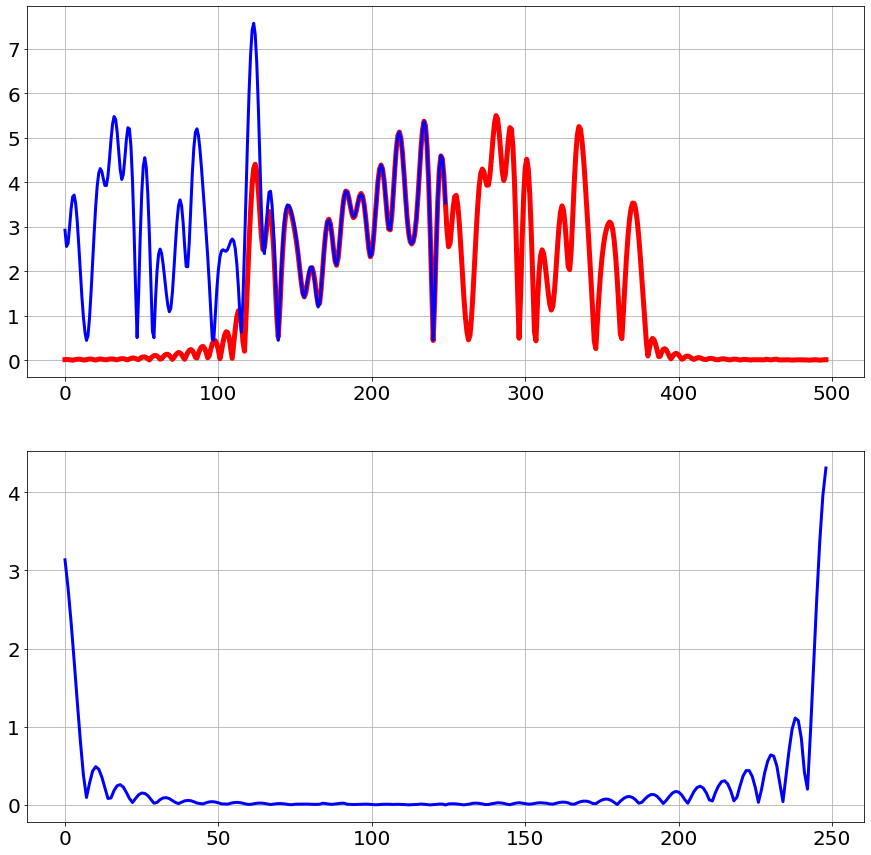

In [121]:
fig, axs = plt.subplots(2, 1, figsize=(15, 15))
# axs[0][0].scatter(xx.real[range_plot] * np.sqrt(mod1.Es) / np.sqrt((10 ** (Pot_Inicial_x * scale_coef / 10)) / 1000),
#             xx.imag[range_plot] * np.sqrt(mod1.Es) / np.sqrt((10 ** (Pot_Inicial_x * scale_coef / 10)) / 1000), s=8, c='r', marker='x')
axs[0].plot(np.absolute(qW), linewidth=5, color='red')
axs[0].plot(np.absolute(q_other), linewidth=3, color='blue')
# axs[0].set_xlabel("Ix component Received")
# axs[0].set_ylabel("Qx component Received")
axs[0].grid(True)
# axs[0][0].set_xlim(0.9, 1.1)
# axs[0][0].set_ylim(0.9, 1.1)

# axs[0][1].scatter(yy.real[range_plot] * np.sqrt(mod2.Es) / np.sqrt((10 ** (Pot_Inicial_y * scale_coef / 10)) / 1000),
#             yy.imag[range_plot] * np.sqrt(mod2.Es) / np.sqrt((10 ** (Pot_Inicial_y * scale_coef / 10)) / 1000), s=8, c='r', marker='x')
axs[1].plot(np.absolute(qW1 - q_other1), linewidth=3, color='blue')
# axs[1].scatter(points_y_orig.real[range_plot], points_y_orig.imag[range_plot], s=8, c='b', marker='x')
# axs[1].set_xlabel("Ix component Received")
# axs[1].set_ylabel("Qx component Received")
axs[1].grid(True)

In [ ]:
import keras

keras.layers.convolutional

0
Signal generation took 9786.848000000002 ms


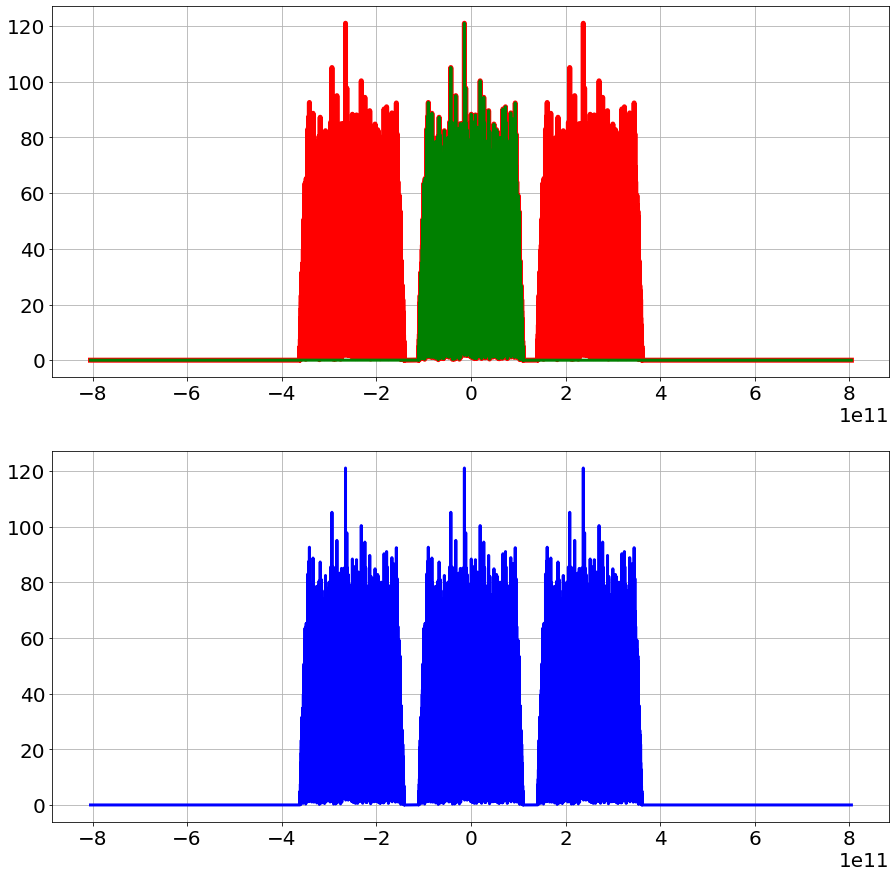

In [24]:
from scipy.fft import fft, fftshift
reload(ch)
wdm = ch.create_wdm_parameters(n_channels=3, p_ave_dbm=0, n_symbols=2 ** 15, m_order=16, roll_off=0.1, upsampling=8,
                               downsampling_rate=4, symb_freq=32e9, channel_spacing=40e9, n_polarisations=2,
                               np_filter=0)

print(ch.check_wdm_parameters(wdm))

signal_x, signal_y, wdm_info = ch.generate_wdm_new(wdm)
signal_x = signal_x.numpy()
signal_y = signal_y.numpy()
nt = len(signal_x)
dt =  1. / wdm['sample_freq']
t_span = dt * nt

w = np.array([(i - nt / 2) * (2. * np.pi / t_span) for i in range(nt)])
f = np.array([(i - nt / 2) * (1. / t_span) for i in range(nt)])

t_span = dt * nt
t = np.array([dt * (k - nt / 2) for k in range(nt)])
# f = np.array([(i - nt / 2) * (1. / t_span) for i in range(nt)])

w_channel = -2. * np.pi * wdm['channel_spacing'] * 0
# signal = matched_filter_wdm(signal, ft_filter_values[k], f, wdm['channel_spacing'], k)
signal_shifted = signal_x * np.exp(1.0j * w_channel * t)
# spectrum = cut_spectrum(tf.signal.fftshift(tf.signal.fft(signal_shifted)), f, wdm['channel_spacing'])
# signals_decoded.append(matched_filter_spectral(spectrum, ft_filter_values[k]))


spectrum = fftshift(fft(signal_shifted))



fig, axs = plt.subplots(2, 1, figsize=(15, 15))
axs[0].plot(w, np.absolute(spectrum), linewidth=5, color='red')
axs[0].plot(w, np.absolute(ch.cut_spectrum(spectrum, f, wdm['channel_spacing'])), linewidth=3, color='green')
axs[0].grid(True)
# axs[0][0].set_xlim(0.9, 1.1)
# axs[0][0].set_ylim(0.9, 1.1)



axs[1].plot(w, np.absolute(fftshift(fft(signal_y))), linewidth=3, color='blue')
axs[1].grid(True)

In [33]:
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt

import channel_model as ch
from importlib import reload
reload(ch)

channel = ch.create_channel_parameters(n_spans=10,
                                       z_span=80,
                                       alpha_db=0.1,
                                       gamma=1.2,
                                       noise_figure_db=-200,
                                       dispersion_parameter=16.8,
                                       dz=1)


wdm = ch.create_wdm_parameters(n_channels=3, p_ave_dbm=2, n_symbols=2 ** 15, m_order=16, roll_off=0.1, upsampling=8,
                      downsampling_rate=4, symb_freq=34e9, channel_spacing=75e9, n_polarisations=2,
                      np_filter=0)






dt = 1. / wdm['sample_freq']

signal_x, signal_y, wdm_info = ch.generate_wdm_new(wdm)
print(np.shape(signal_x))

points_orig_x = wdm_info['points_x']
points_orig_y = wdm_info['points_y']

print(np.shape(points_orig_x), np.shape(points_orig_y))

ft_filter_values = wdm_info['ft_filter_values_x']
np_signal = len(signal_x)

# samples_x = ch.receiver_wdm(signal_x, ft_filter_values[0], wdm)
# samples_y = ch.receiver_wdm(signal_y, ft_filter_values[0], wdm)

signals_decoded = ch.matched_filter_wdm(signal_x, ft_filter_values, wdm)



nt = len(signal_x)
dt = 1. / wdm['sample_freq']
t_span = dt * nt
t = np.array([dt * (k - nt / 2) for k in range(nt)])
f = np.array([(i - nt / 2) * (1. / t_span) for i in range(nt)])
# w = np.array([(i - nt / 2) * (2. * np.pi / t_span) for i in range(nt)])

# signals_decoded = []
#
#
# for k in range(wdm['n_channels']):
#     w_channel = 2. * np.pi * wdm['channel_spacing'] * (k - (wdm['n_channels'] - 1) // 2)
#     # signal = matched_filter_wdm(signal, ft_filter_values[k], f, wdm['channel_spacing'], k)
#     signal_shifted = signal_x * np.exp(1.0j * w_channel * t)
#     spectrum = ch.cut_spectrum(tf.signal.fftshift(tf.signal.fft(signal_shifted)), f, wdm['channel_spacing'])
#     temp = ch.matched_filter_spectral(spectrum, ft_filter_values[k])
#     signals_decoded.append(temp)
#
#     fig, axs = plt.subplots(1, 1, figsize=(15, 15))
#     axs.plot(np.real(temp[::wdm['downsampling_rate']].numpy()), np.imag(temp[::wdm['downsampling_rate']].numpy()),
#              linewidth=0, color='red',
#              marker='.', markersize=10)
#     axs.grid(True)


print(np.shape(signals_decoded), np.mean(signals_decoded[0]))

for k in range(wdm['n_channels']):
    signals_decoded[k] = signals_decoded[k][::wdm['downsampling_rate']]

print(np.shape(signals_decoded))

samples_x = signals_decoded



signals_decoded = ch.matched_filter_wdm(signal_y, ft_filter_values, wdm)
print(np.shape(signals_decoded), np.mean(signals_decoded[0]))

for k in range(wdm['n_channels']):
    signals_decoded[k] = signals_decoded[k][::wdm['downsampling_rate']]

print(np.shape(signals_decoded))

samples_y = signals_decoded


points_x = []
points_y = []

points_x_shifted = []
points_y_shifted = []

sample_step = int(wdm['upsampling'] / wdm['downsampling_rate'])
for k in range(wdm['n_channels']):
    samples_x_temp = samples_x[k]
    samples_y_temp = samples_y[k]
    # print(np.shape(samples_x_temp[::sample_step]))
    points_x.append(samples_x_temp[::sample_step].numpy())
    points_y.append(samples_y_temp[::sample_step].numpy())

    nl_shift_x = ch.nonlinear_shift(points_x[k], points_orig_x[k])
    points_x_shifted.append(points_x[k] * nl_shift_x)

    nl_shift_y = ch.nonlinear_shift(points_y[k], points_orig_y[k])
    points_y_shifted.append(points_y[k] * nl_shift_y)

print(np.shape(points_x), np.shape(points_y))

mod_type = sg.get_modulation_type_from_order(wdm['m_order'])

for k in range(wdm['n_channels']):
    # print("BER (x / y):", BER_est(wdm['m_order'], points_x_shifted, points_orig_x), BER_est(wdm['m_order'], points_y_shifted, points_orig_y))
    print("BER (x / y):",
          sg.get_ber_by_points_unscaled(points_orig_x[k], points_x[k], mod_type),
          sg.get_ber_by_points_unscaled(points_orig_y[k], points_y[k], mod_type))


Signal generation took 9615.644 ms
(262144,)
(3, 32768) (3, 32768)
(3, 262144) (-1.302001730805526e-10+1.8254978500130576e-10j)
(3, 65536)
(3, 262144) (-1.302001730805526e-10+1.8254978500130576e-10j)
(3, 65536)
(3, 32768) (3, 32768)
BER (x / y): (0.0001220703125, 16) (0.0001220703125, 16)
BER (x / y): (0.0001068115234375, 14) (0.0001068115234375, 14)
BER (x / y): (6.866455078125e-05, 9) (6.866455078125e-05, 9)


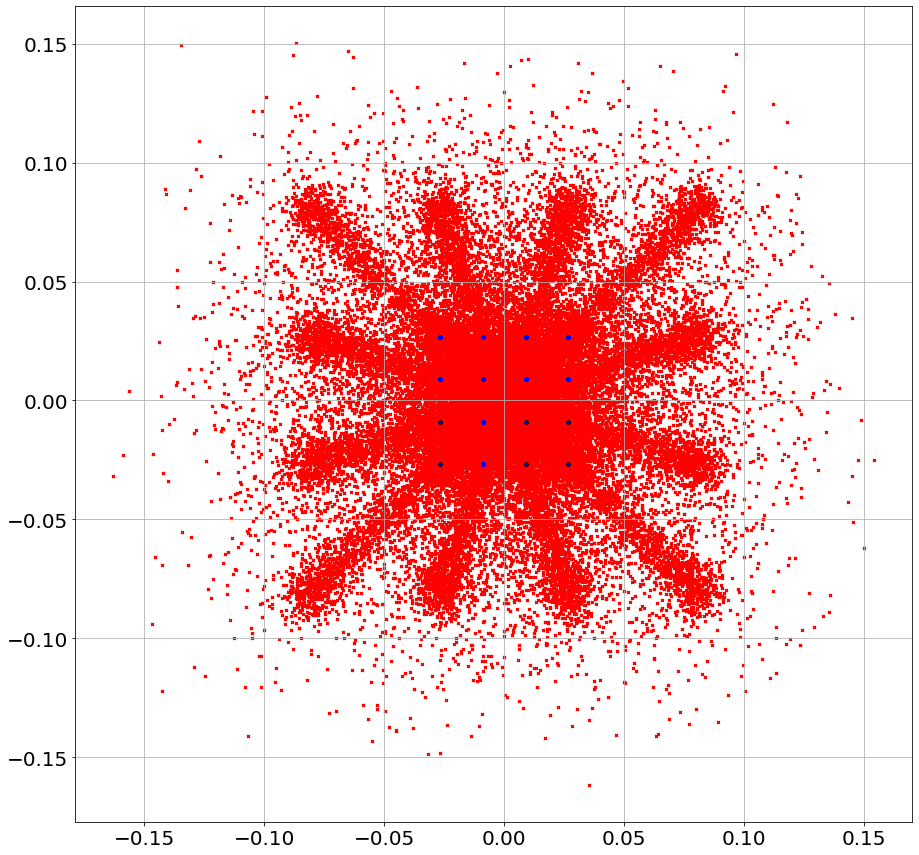

In [49]:
from scipy.fft import ifft, ifftshift

spectrum = ch.cut_spectrum(fftshift(fft(signal_x.numpy())), f, wdm['channel_spacing'])
sig = ifft(ifftshift(spectrum))
sig = ch.matched_filter(tf.cast(sig, tf.complex128), ft_filter_values[0])
temp_p = signal_x[::wdm['downsampling_rate']]  # downsample


fig, axs = plt.subplots(1, 1, figsize=(15, 15))
axs.scatter(temp_p.numpy().real, temp_p.numpy().imag, s=8, c='r', marker='x')
axs.scatter(points_orig_x[1].real, points_orig_x[1].imag, s=8, c='b', marker='x')
axs.grid(True)

In [ ]:
sample_step = int(wdm['upsampling'] / wdm['downsampling_rate'])
points_x_temp = sig[::sample_step].numpy()

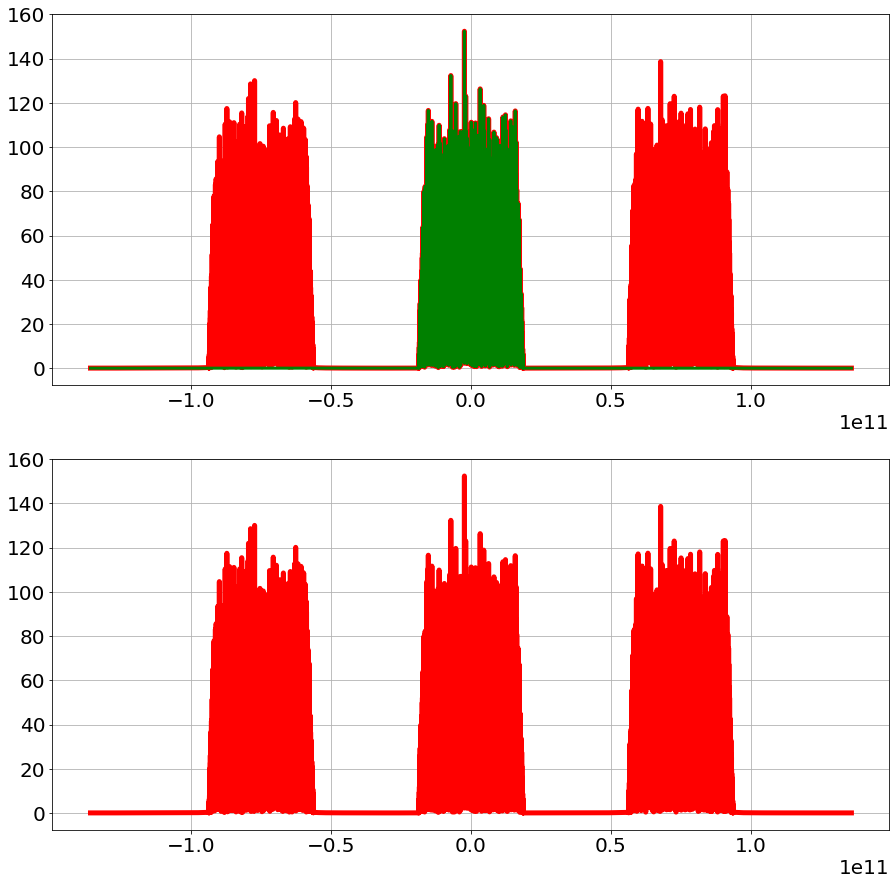

In [43]:
fig, axs = plt.subplots(2, 1, figsize=(15, 15))
axs[0].plot(f, np.absolute(fftshift(fft(signal_x.numpy()))), linewidth=5, color='red')
axs[0].plot(f, np.absolute(spectrum), linewidth=3, color='green')
axs[0].grid(True)
axs[1].plot(f, np.absolute(fftshift(fft(signal_y.numpy()))), linewidth=5, color='red')
axs[1].grid(True)

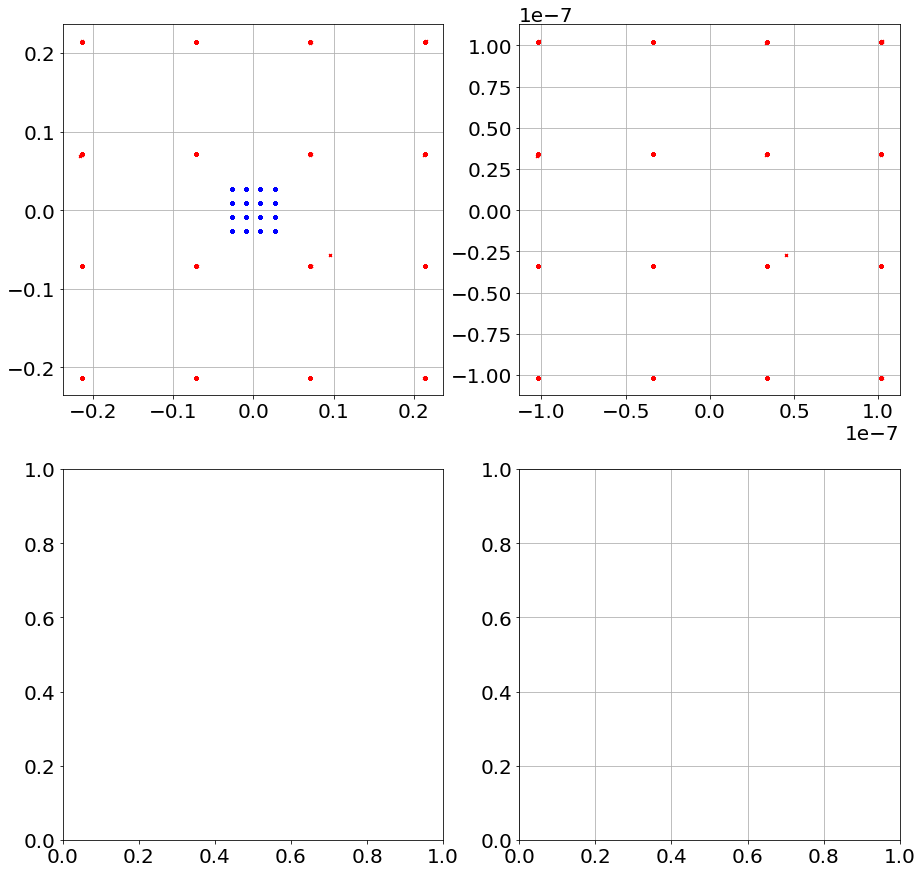

In [41]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 20})

ind = 0

# points_x = result['points_x_shifted'][ind]
# points_y = result['points_y_shifted'][ind]
# points_x_rx = result['points_x'][ind]
# points_y_rx = result['points_y'][ind]
# points_x_orig = result['points_orig_x'][ind]
# points_y_orig = result['points_orig_y'][ind]
#
# points_orig_x[k], points_x[k]
#
#
# scale_x = np.mean(np.absolute(sg.get_constellation('16qam'))) / np.mean(np.absolute(points_x))
# scale_y = np.mean(np.absolute(sg.get_constellation('16qam'))) / np.mean(np.absolute(points_y))
# scale_x_orig = np.mean(np.absolute(sg.get_constellation('16qam'))) / np.mean(np.absolute(points_x_orig))
# scale_y_orig = np.mean(np.absolute(sg.get_constellation('16qam'))) / np.mean(np.absolute(points_y_orig))
#
# points_x_scaled = points_x * scale_x
# points_y_scaled = points_y * scale_y
# points_x_orig_scaled = points_x_orig * scale_x_orig
# points_y_orig_scaled = points_y_orig * scale_y_orig
#

temp = tf.reduce_sum(tf.math.pow(tf.math.abs(ft_filter_values[0]), 2)).numpy()

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0][0].scatter(points_x[ind].real * temp, points_x[ind].imag * temp, s=8, c='r', marker='x')
axs[0][0].scatter(points_x[ind].real * temp, points_x[ind].imag * temp, s=8, c='r', marker='x')
axs[0][0].scatter(points_orig_x[ind].real, points_orig_x[ind].imag, s=8, c='b', marker='x')
axs[0][0].grid(True)

axs[0][1].scatter(points_y[ind].real, points_y[ind].imag, s=8, c='r', marker='x')
# axs[0][1].scatter(points_orig_y[ind].real, points_orig_y[ind].imag, s=8, c='b', marker='x')
axs[0][1].grid(True)

# axs[1][0].scatter(points_x_scaled.real[range_plot], points_x_scaled.imag[range_plot], s=8, c='r', marker='o')
# axs[1][0].scatter(points_x_orig_scaled.real[range_plot], points_x_orig_scaled.imag[range_plot], s=20, c='b', marker='*')
# axs[1][0].grid(True)
#
# axs[1][1].scatter(points_y_scaled.real[range_plot], points_y_scaled.imag[range_plot], s=8, c='r', marker='x')
# axs[1][1].scatter(points_y_orig_scaled.real[range_plot], points_y_orig_scaled.imag[range_plot], s=8, c='b', marker='x')
axs[1][1].grid(True)

In [38]:
tf.reduce_sum(tf.math.pow(tf.math.abs(ft_filter_values[0]), 2)).numpy()

2097151.6049574157

269306.8950128944 2097151.6049574157 3.543075158418698e-05
6.603693909495508e-05 2.519109784484888e-10 262143.9506196767
0.02994655163482449 1.1423702873959575e-07 262143.99975937637
1.0273244695377688


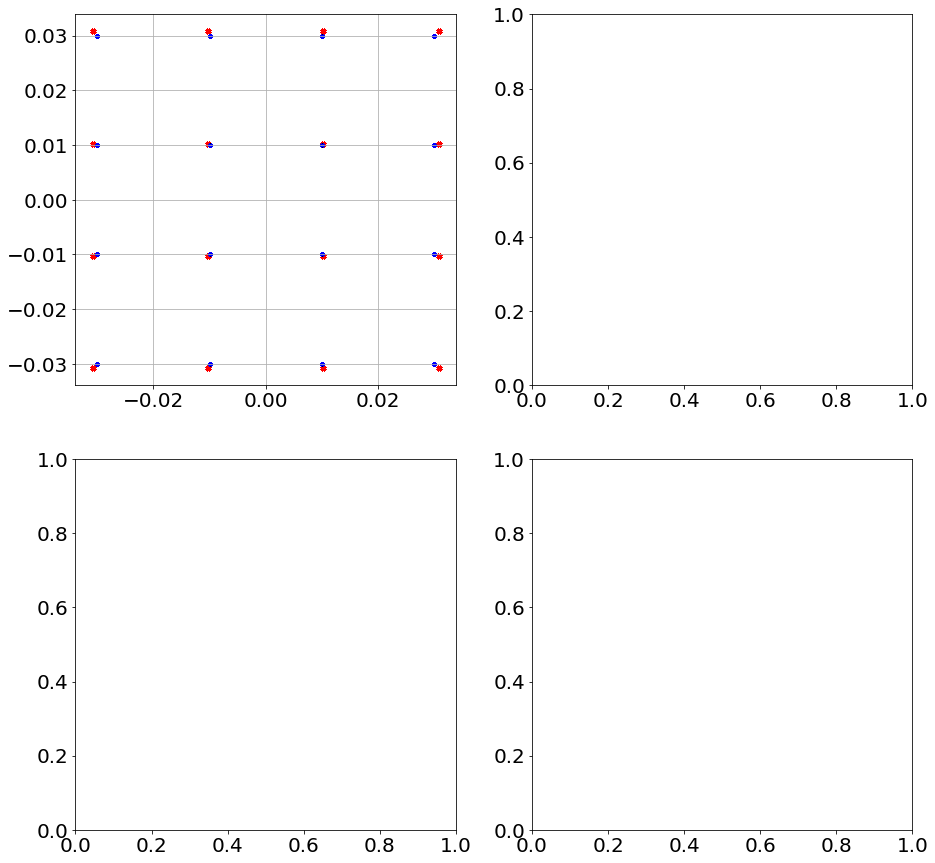

In [20]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 20})

import channel_model as ch
from importlib import reload
reload(ch)

import tensorflow as tf

wdm_test = ch.get_default_wdm_parameters()
sig, add = ch.generate_wdm_base(wdm_test)
filt = add['ft_filter_values']
p_x_orig = add['points']

# w_channel = 2. * np.pi * wdm['channel_spacing'] * (k - (wdm['n_channels'] - 1) // 2)
# signal_shifted = signal * np.exp(1.0j * w_channel * t)
# spectrum = cut_spectrum(tf.signal.fftshift(tf.signal.fft(signal_shifted)), f, wdm['channel_spacing'])
# signals_decoded.append(matched_filter_spectral(spectrum, ft_filter_values[k]))


decoded = ch.matched_filter(sig, filt)
# decoded = ch.filter_shaper(sig, filt)

p_x = decoded[::wdm['upsampling']].numpy()

coef0 = np.absolute(np.mean(p_x_orig) / np.mean(p_x))
coef = 1.0

val2 = tf.reduce_sum(tf.math.pow(tf.math.abs(filt), 2)).numpy()
val = tf.reduce_sum(tf.math.abs(filt)).numpy()
val3 = tf.math.abs(tf.reduce_sum(filt)).numpy()
coef = val

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0][0].scatter(p_x.real * coef, p_x.imag * coef, s=16, c='r', marker='x')
axs[0][0].scatter(p_x_orig.real, p_x_orig.imag, s=8, c='b', marker='x')
axs[0][0].grid(True)

# axs[0][1].scatter(points_y[ind].real, points_y[ind].imag, s=8, c='r', marker='x')
# axs[0][1].scatter(points_orig_y[ind].real, points_orig_y[ind].imag, s=8, c='b', marker='x')
# axs[0][1].grid(True)

print(val, val2, val3)
print(np.absolute(np.mean(p_x_orig)), np.absolute(np.mean(p_x)), np.absolute(np.mean(p_x_orig) / np.mean(p_x)))

print(np.mean(np.absolute(p_x_orig)), np.mean(np.absolute(p_x)), np.mean(np.absolute(p_x_orig) / np.absolute(p_x)))

print(coef / coef0)